# Estrategia de Retención de Clientes para Model Fitness: Análisis Predictivo de "Churn"

## Introducción y objetivos:

* ### En este estudio, haremos un recorrido analítico crucial para la salud económica y el crecimiento de la cadena de gimnasios.

* ### Nuestro objetivo principal es desarrollar una estrategia de retención de clientes basada en datos proporcionados; lo que implica entender por qué algunos clientes deciden dejar de ser miembros del gimnasio, lo que se conoce en el mundo del analisis y negocios como "Churn"

* ### A través del análisis de los perfiles de clientes, buscaremos predecir qué clientes tienen una alta probabilidad de abandonar en el próximo mes, también identificar los factores clave que impulsan estas decisiones. Esto nos permitirá perfilar a los usuarios comúnes y elaborar recomendaciones accionables y concretas para Model Fitness.


## Pasos 1 & 2:
### Carga de datos & EDA

In [ ]:
from google.colab import drive

#Importamos las librerías a utilizar y visualizamos el DataFrame
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyecto_sprint14/gym_churn_us.csv')
print("--------Dataset cargado exitosamente-------")
print(f"\n Tamaño del Dataframe {df.shape}")
print('\n Informacion del Dataframe: ')
display(df.info())
print("\n Primeras filas del Dataframe:")
display(df.head())
print("\n 5 filas aleatorias del Dataframe:")
display(df.sample(5))

--------Dataset cargado exitosamente-------

 Tamaño del Dataframe (4000, 14)

 Informacion del Dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime    

None


 Primeras filas del Dataframe:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0



 5 filas aleatorias del Dataframe:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1092,0,1,1,1,1,1,0,33,151.816291,1.0,3,1.482335,1.429165,0
976,0,1,0,0,1,12,1,32,290.047394,11.0,12,2.185113,2.204389,0
377,0,1,0,0,1,6,0,30,121.418909,6.0,5,1.203153,1.348236,0
3831,0,1,1,1,1,12,1,30,41.404023,10.0,5,1.528146,1.357781,0
3028,1,1,0,0,1,1,0,28,100.949442,1.0,1,1.757807,2.008081,1


### Observaciónes:
#### Podemos ver que no contamos con valores nulos lo cual es bueno e indica una buena calidad de la informacion que tenemos.
#### La informacion en su mayoria esta en formato binario de 0 e 1.
#### Vamos a proceder siempre con un analisis mas profundo con respecto a los nulos viendo sus valores estadisticos.

In [ ]:
# Haremos una visualizacion de las caracteristicas estadísticas.
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Observaciones:
#### Hemos confirmado la ausencia de valores nulos y tenemos una buena comprensión de la distribución y las tendencias de nuestras variables numéricas. Hay varios datos interesantes como el promedio de edad con tendencia a joven-media; además notamos que la mayoría viven cerca del gimnasio.
#### La tasa de Churn del 26.5% es un punto de partida importante para nuestro análisis. Ahora podemos avanzar con los siguientes puntos del EDA; separar los usuarios por Churn y tratar de identificar patrones en base a sus datos estadisticos.

## Valores Medios de Características por Grupo de Churn
Calcular y mostrar los valores medios de todas las características para los dos grupos: clientes que se fueron Churn=1 y clientes que se quedaron Churn=0.


In [ ]:
# Agrupamos por Churns y calculamos la media de todas las columnas.
medias_por_grupo = df.groupby('Churn').mean()
display(medias_por_grupo)



,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Visualización de Distribuciones
#### Trazaremos histogramas para las características numéricas, separando o superponiendo las distribuciones para clientes con y sin 'Churn'.


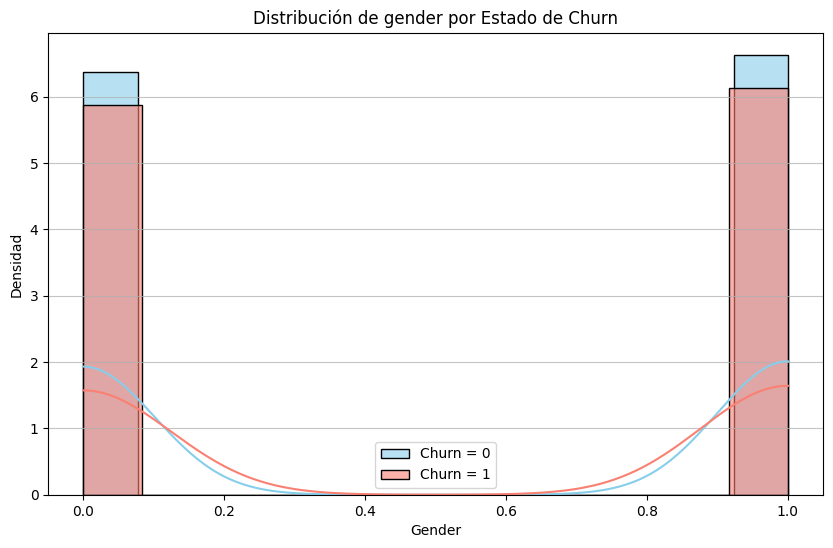

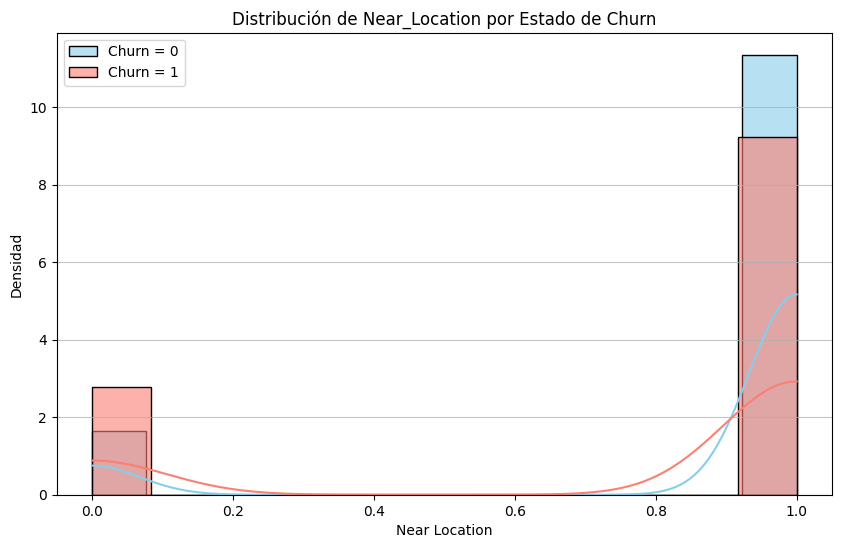

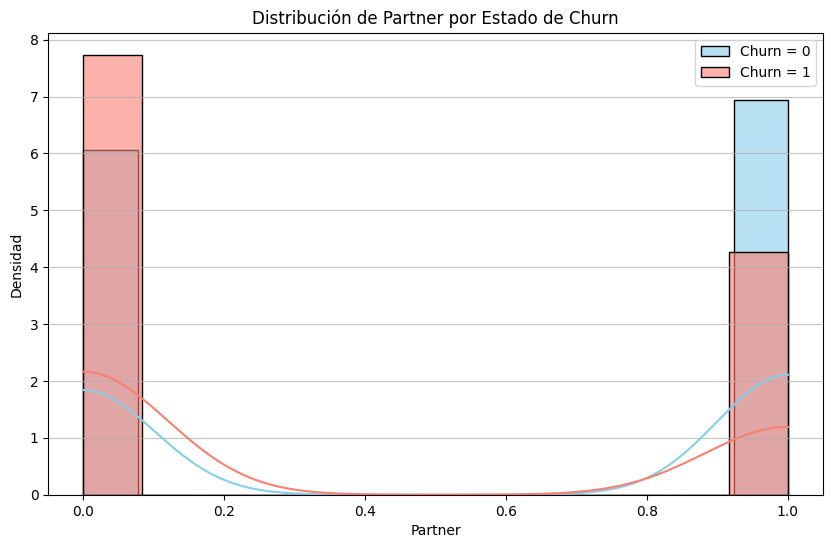

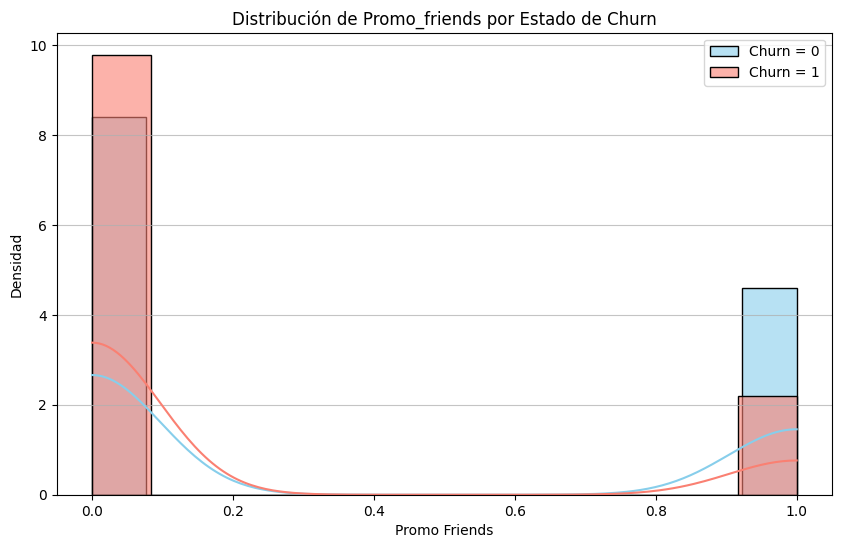

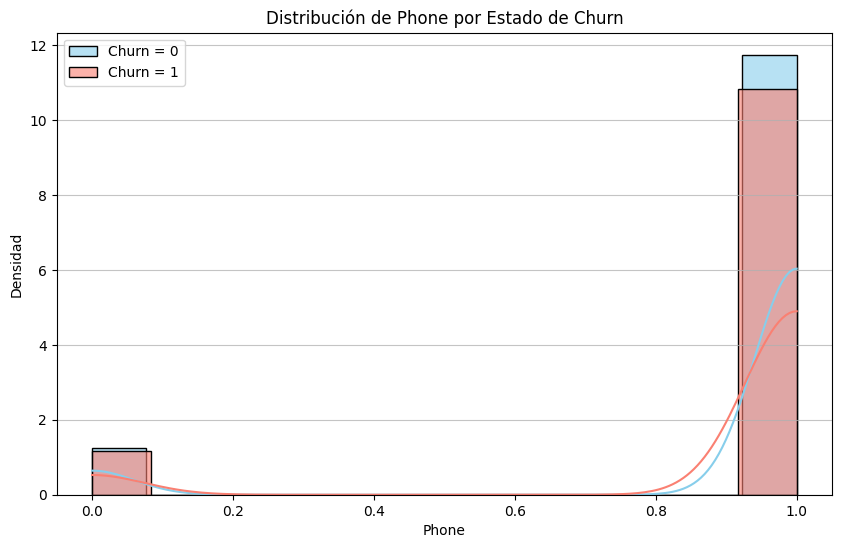

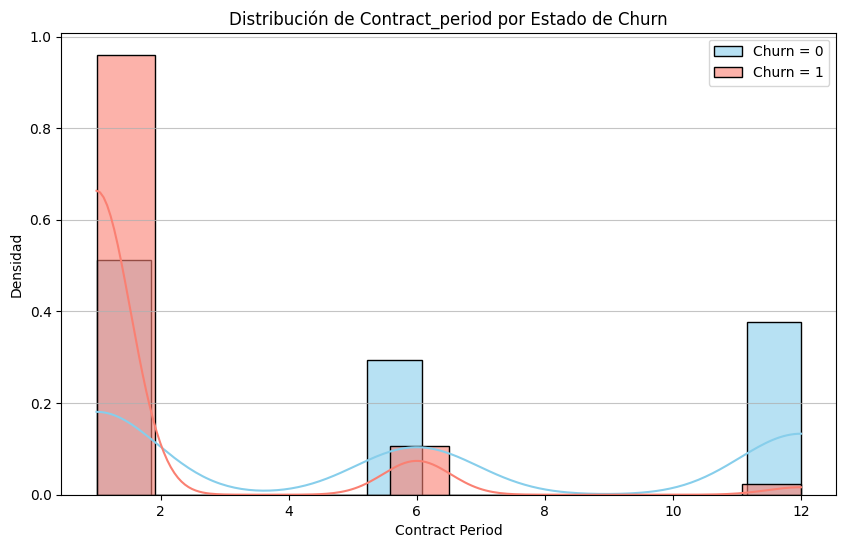

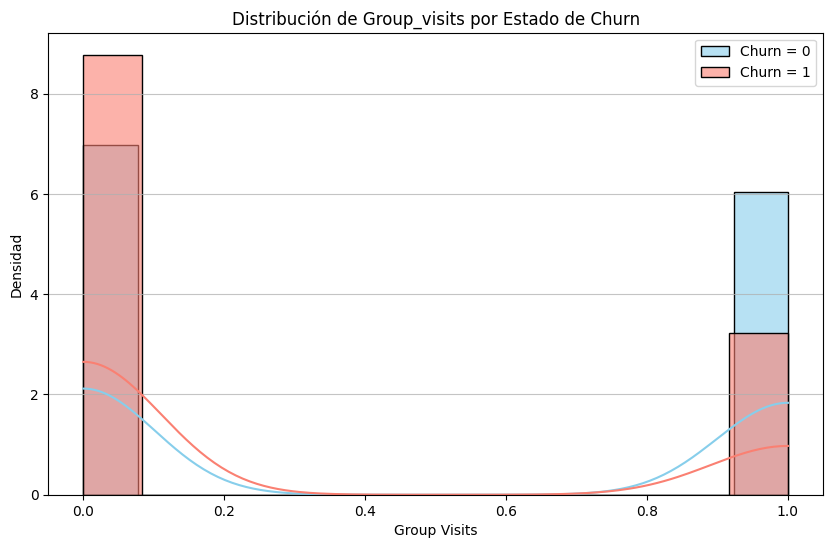

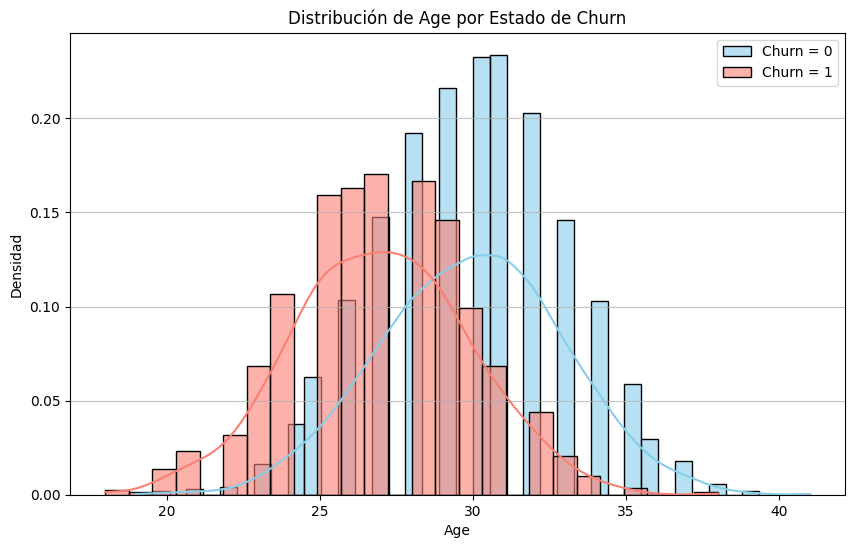

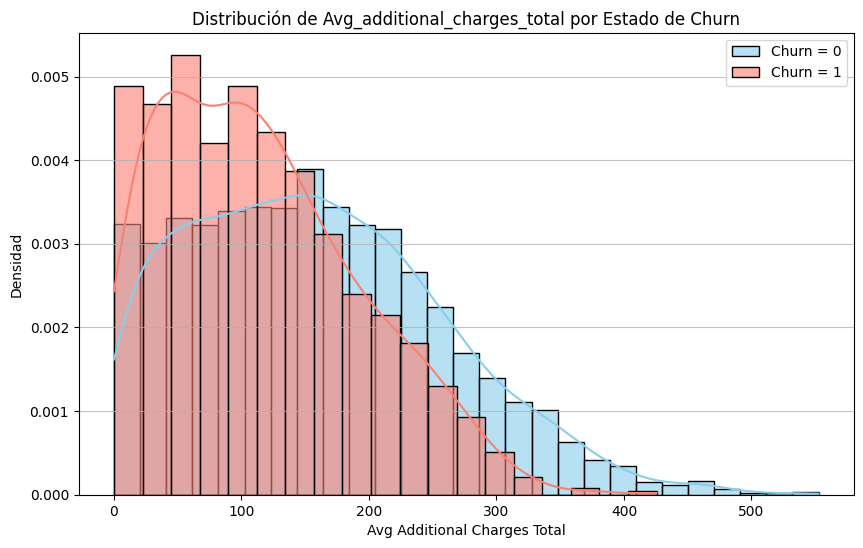

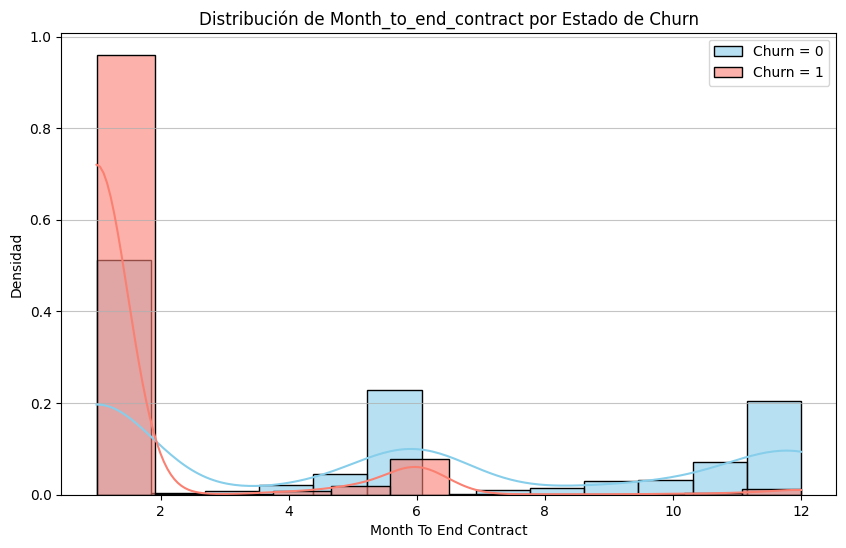

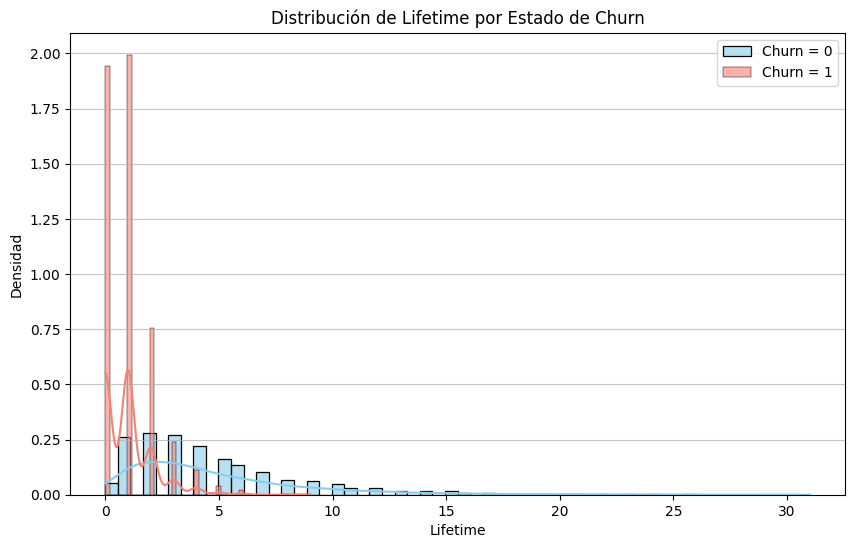

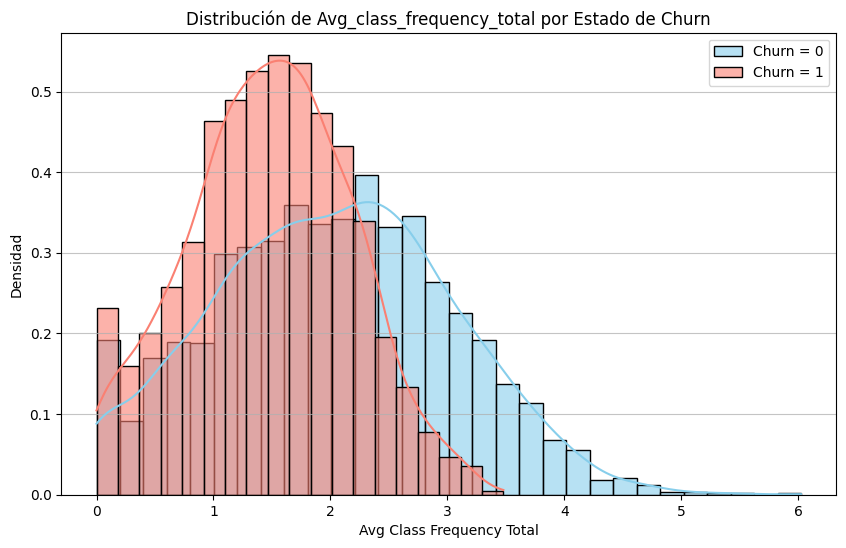

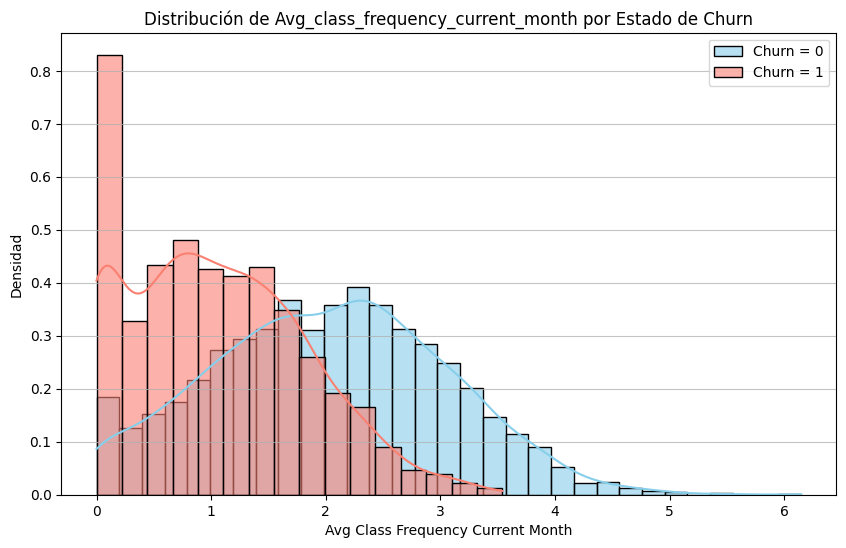

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenemos una lista de las columnas numericas exceptuando la de "Churn"
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')

# Iteramos sobre cada columna y generamos un histograma superpuesto para ambos Churns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df.loc[df['Churn'] == 0, column], color='skyblue', label='Churn = 0', kde=True, stat='density', alpha=0.6)
    sns.histplot(df.loc[df['Churn'] == 1, column], color='salmon', label='Churn = 1', kde=True, stat='density', alpha=0.6)
    plt.title(f'Distribución de {column} por Estado de Churn')
    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()

## Observaciones:
### El análisis de distribución con los histogramas revela que la perdida de clientes en el gimnasio está impulsada por factores de comportamiento y contrato, y no por demografía, genero o otros programas. Los tres puntos de  más críticos para la retención son:

* ### Compromiso Contractual y Financiero: Los clientes con contratos de 1 mes tienen una tasa de irse drásticamente superior, y la cancelación se dispara tambien cuando tienen planes a mas meses y ya les queda solo 1 mes para finalizarlo. Además por otro lado se observa que los clientes que realizan mayores gastos adicionales muestran una tasa de retención mucho más alta.

* ### El Onboarding o "bienvenida" puede ser Clave: La mayoría de las fugas ocurren en la fase inicial del ciclo de vida del cliente indicando que el período de "bienvenida" es el más vulnerable.

* ### Frecuencia y Conexión Social: La baja frecuencia de visitas en el mes actual es el predictor de fuga más importante. La baja asistencia está directamente vinculada a la ausencia de participación en clases grupales y a no haber sido recomendado por un amigo, lo que sugiere que la falta de integración social puede ser algo que impulse la deserción.

### Sugerencia: Para reducir la rotación, el gimnasio debe centrar sus esfuerzos en incentivar contratos largos, mejorar la experiencia del usuario y la conexión social en los primeros 3 meses y monitorear la asistencia y crear mecanismos de contacto proactivo con los clientes cuya frecuencia de visita disminuya.

## Creación y Visualización de la Matriz de Correlación

### Calcularemos la matriz de correlación entre todas las variables numéricas y la visualizaremos con un heatmap.


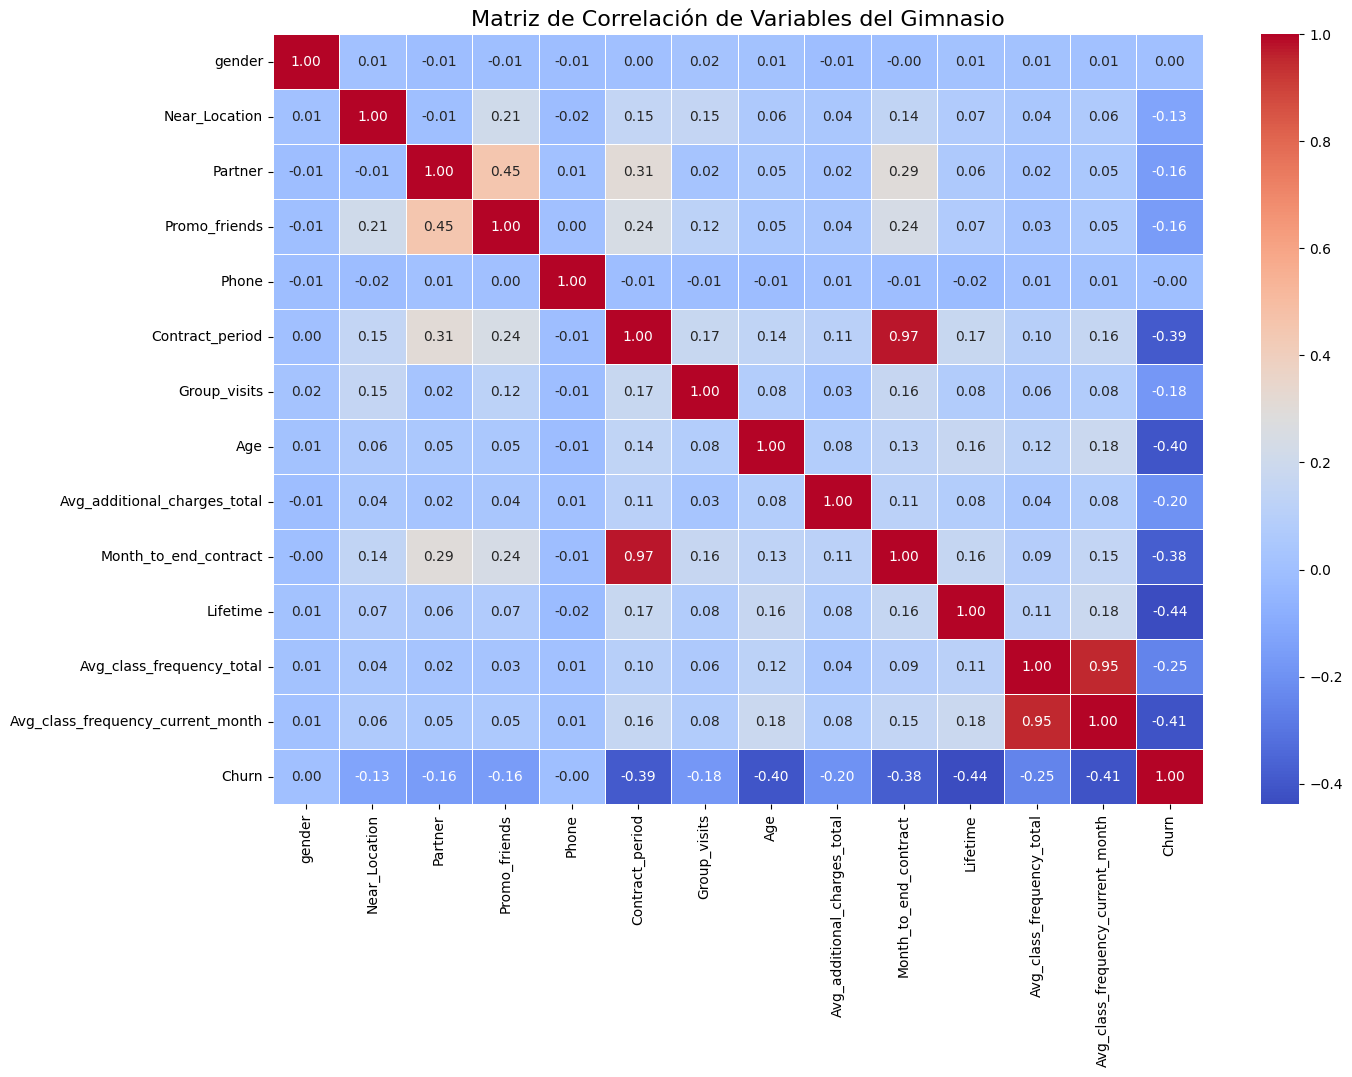

In [ ]:
# Calculamos la matriz de correlación
corr_matrix = df.corr()

# Creamos una figura para el gráfico con un tamaño adecuado
plt.figure(figsize=(15, 10))

# Generamos un heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables del Gimnasio', fontsize=16)
plt.show()

### Observaciones:
####La matriz nos confirma que los principales motivantes de la fuga de clientes en el gimnasio son la frecuencia de asistencia reciente, la antigüedad del cliente y la duración/proximidad al vencimiento del contrato.

#### Podemos observar por las metreicas mas relevantes que el factor compromiso es sumamente importante, estos factores son los predictores mas fuertes de retención.
#### Los clientes con contratos más largos, mayor antigüedad y que asisten más regularmente son mucho menos propensos a abandonar.
#### También observamos que el factor "social" influye. Las conexiones con amigos o promociones/beneficios recibidos quizas por terceros aumentan la lealtad y la retención.
#### EL gasto adicional es también interesante porque puede asociarse con una menor posibilidad de abandono porque si el cliente gasta más en otros servicios es porque tiene mayor satisfacción general.

## Conclusiones del EDA:
### Este análisis exploratorio nos ha dado una comprensión sólida de los factores que más incluyen en el churn. Vemos fuertes indicios de que las estrategias de retención deberian centrarse en aumentar el compromiso a largo plazo de los clientes; esto se podría hacerfomentando la asistencia regular, incentivando las promociones o programa de referencias sociales y prestar atencion cuidadosa a los clientes en el primer mes y a finales de sus contratos para aumentar su satisfacción y su lealtad para seguir.

## Paso 3:
### Construcción de un modelo para la predicción de perdida de clientes.

### Objetivo:
### Crear un modelo de clasificación binaria que prediga si un cliente abandonará el gimnasio el próximo mes basándonos en las características y detalles que hemos explorado anteriormente. Esto nos permitirá identificar proactivamente a los clientes en riesgo.

### Procedimiento y lógica:
#### Vamos a entrenar 2 tipos de modelos de clasificacion; Regresión logística y Random Forest. Porque por un lado, regresión logística es buenos en general para clasificacion binaria porque da proporcion de probabilidades de pertenencia a cierta clase. y el random forest es robusto y generalmente da un buen rendimiento sin necesidad de escalarlo en caracteristicas y puede captar relaciones no lineales.

### Vamos a medir el rendimiento de ambos modelos usando metricas clave como: exactitud, precisión y sensibilidad o recall.

In [ ]:
#Importamos las librerías necesarias

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separamos características (X) y variable objetivo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Dividimos los conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Inicializamos StandardScaler
scaler = StandardScaler()

# Escalamos las características del conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Escalamos las características del conjunto de validación luego mostramos
X_test_scaled = scaler.transform(X_test)

print("Datos separados en conjuntos de entrenamiento/prueba y escalados exitosamente.")

X shape: (4000, 13)
y shape: (4000,)
X_train shape: (3000, 13)
X_test shape: (1000, 13)
y_train shape: (3000,)
y_test shape: (1000,)
Datos separados en conjuntos de entrenamiento/prueba y escalados exitosamente.


####Una vez preparados los datos, separados en conjuntos de entrenamiento y prueba, y escalados, el siguiente paso es entrenar los modelos de clasificación especificados. Comenzaremos entrenando un modelo de regresión logística.



In [ ]:
# Importamos las librerías necesarias.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Inicializamos y entrenamos el modelo de Regresión Logística
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(X_train_scaled, y_train)

# Realizamos las predicciones en el conjunto de prueba
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluamos el modelo en base a las caracteristicas y mostramos resultados.
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)

print(f"Métricas del modelo Regresión Logística:")
print(f"  Accuracy: {lr_accuracy:.4f}")
print(f"  Precision: {lr_precision:.4f}")
print(f"  Recall: {lr_recall:.4f}")


Métricas del modelo Regresión Logística:
  Accuracy: 0.9260
  Precision: 0.8841
  Recall: 0.8142


#### Siguiendo el plan de entrenar dos modelos de clasificación, luego de entrenar y evaluar el modelo de Regresión Logística, el siguiente paso es entrenar un modelo clasificador Random Forest para predecir la pérdida de clientes.

In [ ]:
# Importamoas la librería necesaria

from sklearn.ensemble import RandomForestClassifier

# Inicializamos y entrenamos el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Realizamos las predicciones en el conjunto de prueba
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluamos el modelo y mostramos resultados
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)

print(f"Métricas del modelo Random Forest:")
print(f"  Accuracy: {rf_accuracy:.4f}")
print(f"  Precision: {rf_precision:.4f}")
print(f"  Recall: {rf_recall:.4f}")

Métricas del modelo Random Forest:
  Accuracy: 0.9150
  Precision: 0.8621
  Recall: 0.7905


## Comparación de Modelos y Conclusiones

### Comparamos las métricas de rendimiento exactitud, precisión y recall obtenidas de los modelos de Regresión Logística y Random Forest para determinar cual de los 2 modelos obtuvo mejores resultados para la predicción de churn.

### Comparación de Métricas de Rendimiento

A continuación, se presentan las métricas de rendimiento clave para ambos modelos de clasificación:

| Métrica   | Regresión Logística | Random Forest |
|-----------|---------------------|---------------|
| **Accuracy**| 0.9260              | 0.9150        |
| **Precision**| 0.8841              | 0.8621        |
| **Recall**  | 0.8142              | 0.7905        |



## Conclusión y análisis de los Modelos
#### Al comparar las métricas de rendimiento obtenidas para la Regresión Logística y el Random Forest, observamos lo siguiente:

* #### Accuracy: La Regresión Logística muestra una exactitud ligeramente superior de 0.9260 en comparación con el Bosque Aleatorio en 0.9150. Esto indica que la Regresión Logística clasifica correctamente una proporción levemente mayor de las predicciones totales.

* #### Precision: La Regresión Logística también tiene una precisión más alta de 0.8841 frente al Bosque Aleatorio en 0.8621. Esto significa que, cuando el modelo predice que un cliente se va a ir, es más probable que la predicción sea correcta. Esto ayuda a minimizar los "falsos positivos" y permite optimizar los recursos de retención.

* #### Recall: Este es el factor más importante para nuestro objetivo de retención. La Regresión Logística obtiene un Recall de 0.8142 en comparación con el Bosque Aleatorio en 0.7905. El recall más alto es preferible porque significa que el modelo es capaz de identificar una mayor proporción de todos los clientes que realmente se van a ir del gimnasio. Otra vez, la Regresión Logística es mejor para minimizar los "falsos negativos"

### Conclusión:
#### Basándonos en el rendimiento de las 3 métricas de exactitud y precisión, y especialmente en la Sensibilidad o Recall, el modelo de Regresión Logística nos da un rendimiento superior para la predicción de churn en este conjunto de datos. El mayor Recall de la Regresión Logística la convierte en la opción preferible entre los dos modelos evaluados.

## Paso 4:
## Creación de Clusteres de usuarios
### Objetivo:
### Con el Clustering, en lugar de predecir una única variable como Churn, ahora buscaremos grupos de clientes con características similares y al identificarlos, podemos diseñar estrategias de retención más personalizadas para cada grupo.

In [ ]:
# Si no la tenemos, importamos la libreria from sklearn.preprocessing import StandardScaler

# Eliminamos la columna 'Churn' del DataFrame
X_scaled_data = df.drop('Churn', axis=1)

# Inicializamos el StandardScaler
scaler = StandardScaler()

# Ajustamos y transformamos los datos, luego mostramos.
X_scaled_data = scaler.fit_transform(X_scaled_data)

print("Columna 'Churn' eliminada y datos estandarizados exitosamente.")
print(f"Dimensiones de los datos estandarizados: {X_scaled_data.shape}")

Columna 'Churn' eliminada y datos estandarizados exitosamente.
Dimensiones de los datos estandarizados: (4000, 13)


### Creación de Dendrograma para Estimación de Clústeres

### El dendrograma nos ayudará a visualizar la jerarquía de clústeres y a estimar el número óptimo de clústeres para K-means.

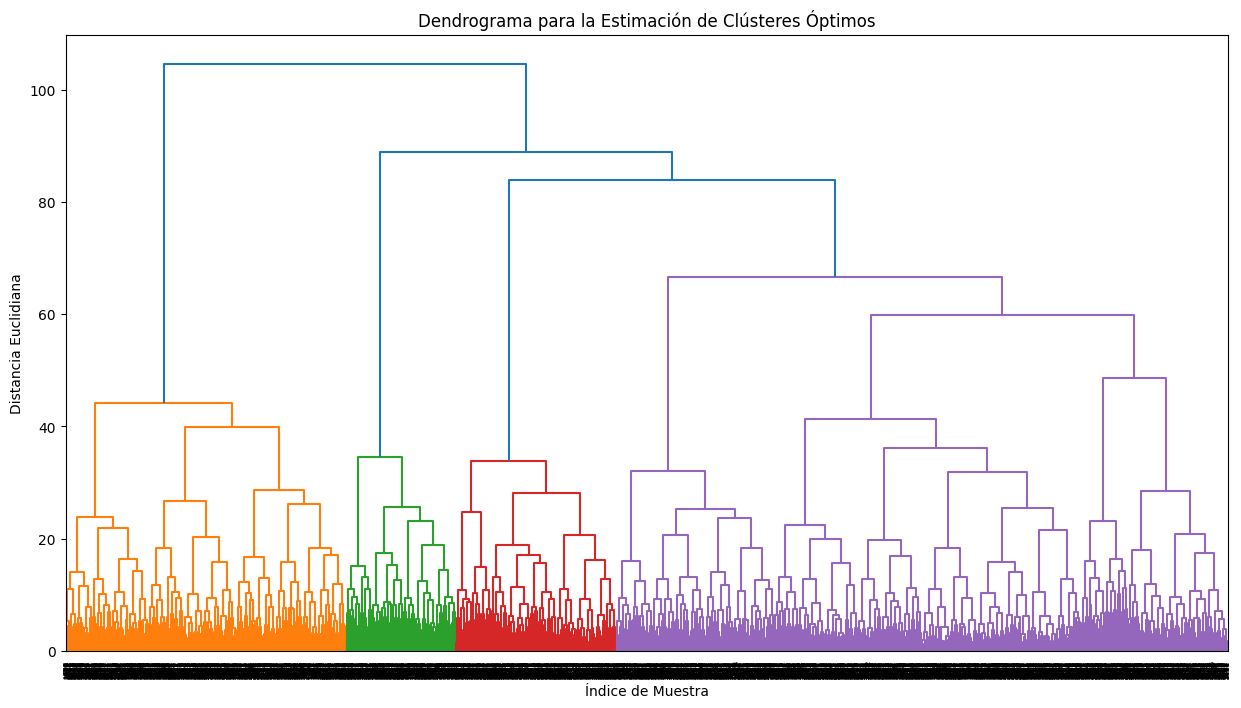

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Creamos una matriz de enlaces usando linkage()
linked = hierarchy.linkage(X_scaled_data, method='ward', metric='euclidean')

# Generamos el dendrograma
plt.figure(figsize=(15, 8))
hierarchy.dendrogram(linked)
plt.title('Dendrograma para la Estimación de Clústeres Óptimos')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia Euclidiana')
plt.show()

**Reasoning**:
Now that the dendrogram has been generated to help estimate the number of clusters, the next step is to train a K-means model with 5 clusters as specified in the task, predict the cluster for each customer, and add this information back to the original DataFrame. Then, I will calculate and display the mean characteristics for each cluster to start profiling them.



In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Entrenamos un modelo K-means con 5 clústeres
kmeans_model = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_model.fit(X_scaled_data)

# Predecimos los clústeres para cada cliente
clusters = kmeans_model.predict(X_scaled_data)

# Agregamos la columna de clústeres al DataFrame original
df['cluster'] = clusters

# Calculamos las medias de las características para cada clúster
cluster_means = df.groupby('cluster').mean()

print("Modelo K-means entrenado y clústeres asignados exitosamente.")
print("Medias de las características por clúster:")
display(cluster_means)

Modelo K-means entrenado y clústeres asignados exitosamente.
Medias de las características por clúster:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.496324,0.000000,0.466912,0.077206,0.915441,2.209559,0.215074,28.483456,133.630215,2.073529,2.781250,1.657657,1.466870,0.450368
1,0.498932,0.944444,0.740385,0.485043,0.900641,11.884615,0.551282,29.931624,164.625700,10.877137,4.674145,1.999110,1.990516,0.022436
2,0.486068,0.998452,0.823529,1.000000,0.899381,3.165635,0.456656,29.224458,141.868789,2.927245,3.739938,1.742540,1.636485,0.246130
3,0.488708,1.000000,0.242999,0.020777,0.902439,1.986450,0.320687,28.209575,131.151639,1.902439,2.391147,1.272203,1.029702,0.526649
4,0.585398,0.971317,0.259452,0.089961,0.903520,2.809648,0.477184,30.142112,161.875250,2.588005,5.147327,2.880231,2.881432,0.069100


### Observaciones generales:
#### Lo que más llama la atención es la clara diferenciación en torno al compromiso del cliente; la duración del contrato, el tiempo de membresía, la frecuencia de visitas y el gasto adicional están muy asociados a la lealtad. La cercanía al gimnasio y las conexiones sociales también juegan un papel, pero el compromiso a largo plazo y la actividad constante son los grandes reductores del Churn.

### Análisis detallado de los Clústeres y Perfiles de Usuario

Al analizar las medias de las características para cada clúster, podemos identificar los siguientes perfiles de clientes:

*   **Clúster 0: Clientes de Bajo Compromiso y Cercanía; con riesgo Moderado de Churn**
    *   **Churn:** 0.450
    *   **Near_Location:** 0 todos viven lejos del gimnasio.
    *   **Contract_period:** 2.21 contratos cortos
    *   **Lifetime:** 2.78 poca antigüedad
    *   **Avg_class_frequency_current_month:** 1.47 frecuencia de visitas moderada-baja
    *   **Detalle del perfil:** Estos clientes no viven cerca del gimnasio, tienen contratos cortos y una antigüedad relativamente baja. Su frecuencia de visitas no es muy alta. Son clientes de alto riesgo de abandono que necesitan incentivos para comprometerse más y quizás compensar la distancia con beneficios adicionales.

*   **Clúster 1: Clientes leales de largo plazo; con bajo riesgo de Churn**
    *   **Churn:** 0.022 muy bajo
    *   **Contract_period:** 11.88 contratos muy largos, casi 1 año
    *   **Month_to_end_contract:** 10.88 mucho tiempo restante en el contrato
    *   **Lifetime:** 4.67 buena antigüedad
    *   **Avg_additional_charges_total:** 164.63 gastos adicionales elevados
    *   **Detalle del perfil:** Este es el grupo de clientes más valioso y leal. Tienen contratos de larga duración, alta antigüedad y realizan gastos adicionales significativos. Su tasa de churn es mínima. La estrategia entonces debe enfocarse en mantener su satisfacción y quizás ofrecer programas de lealtad exclusivos.

*   **Clúster 2: Clientes activos con amigos; riesgo moderado de Churn**
    *   **Churn:** 0.246 moderado
    *   **Promo_friends:** 1.000 todos vinieron por promoción de amigos
    *   **Partner:** 0.824 alta proporción de empleados de empresas asociadas
    *   **Contract_period:** 3.17 contratos de duración media
    *   **Avg_class_frequency_current_month:** 1.64 frecuencia de visitas moderada
    *   **Detalle del perfil:** Estos clientes están altamente conectados socialmente con el gimnasio, ya sea por promo de amigos o siendo partners. Su tasa de churn es cercana al promedio. Se pueden implementar estrategias para fortalecer la comunidad y recompensar las referencias, incentivando la prolongación de sus contratos y la frecuencia de uso.

*   **Clúster 3: Clientes nuevos de bajo compromiso; mayor riesgo de Churn**
    *   **Churn:** 0.527 el más alto
    *   **Contract_period:** 1.99 contratos muy cortos
    *   **Month_to_end_contract:** 1.90 pocos meses para el fin del contrato
    *   **Lifetime:** 2.39 antigüedad muy baja
    *   **Avg_class_frequency_current_month:** 1.03 frecuencia de visitas muy baja
    *   **Perfil:** Este es el grupo con mayor riesgo de abandono. Son clientes relativamente nuevos, con contratos de corta duración y baja frecuencia de visitas. La estrategia de retención debe ser intensiva en los primeros meses, ofreciendo programas de onboarding, seguimiento personalizado y clases introductorias para fomentar la participación y el compromiso.

*   **Clúster 4: Clientes muy activos y antiguos; bajo riesgo de Churn**
    *   **Churn:** 0.069 bajo
    *   **Avg_class_frequency_total:** 2.88 muy alta frecuencia de clases
    *   **Avg_class_frequency_current_month:** 2.88 frecuencia actual muy alta
    *   **Lifetime:** 5.15 antigüedad más alta
    *   **Age:** 30.14 ligeramente mayores que el promedio
    *   **Perfil:** Estos son clientes muy activos y comprometidos, que asisten con mucha regularidad y tienen la mayor antigüedad. Aunque su periodo de contrato no es el más largo, su compromiso con la asistencia es clave. La estrategia debe orientarse a mantener su alta participación, quizás ofreciendo talleres avanzados o programas de membresía premium que reconozcan su lealtad y uso intensivo.

### Impacto en la Estrategia de Retención de Model Fitness:

La segmentación por clústeres le permite al gimnasio diseñar estrategias de retención personalizadas y al entender las motivaciones y comportamientos de cada grupo, Model Fitness puede asignar recursos de manera más eficiente y efectiva para maximizar la retención de clientes como por ejemplo:

*   **Prevención de Churn:** Priorizar las intervenciones en los **Clústeres 0 y 3**, que muestran las tasas de churn más altas y características de bajo compromiso. Esto podría incluir por ejemplo un contacto proactivo, ofertas de renovación de contratos más largos, programas de incentivación de asistencia y mejoras en la experiencia de 'onboarding'.
*   **Fomentar la Lealtad:** Mantener la satisfacción de los **Clústeres 1 y 4**, que son los más leales y comprometidos. Se podrían implementar programas de fidelización, reconocimiento por antigüedad o alta frecuencia, y acceso a servicios exclusivos.
*   **Aprovechar Conexiones Sociales:** Para el **Clúster 2**, enfocarse en fortalecer los lazos sociales o comunitarios, organizar eventos grupales o incentivar aún más las referencias para mantener su compromiso.



## Visualización de Distribuciones por Clúster
Crearemos gráficos de distribución para cada característica numérica del DataFrame, diferenciando las distribuciones por el 'cluster' al que pertenece cada cliente.

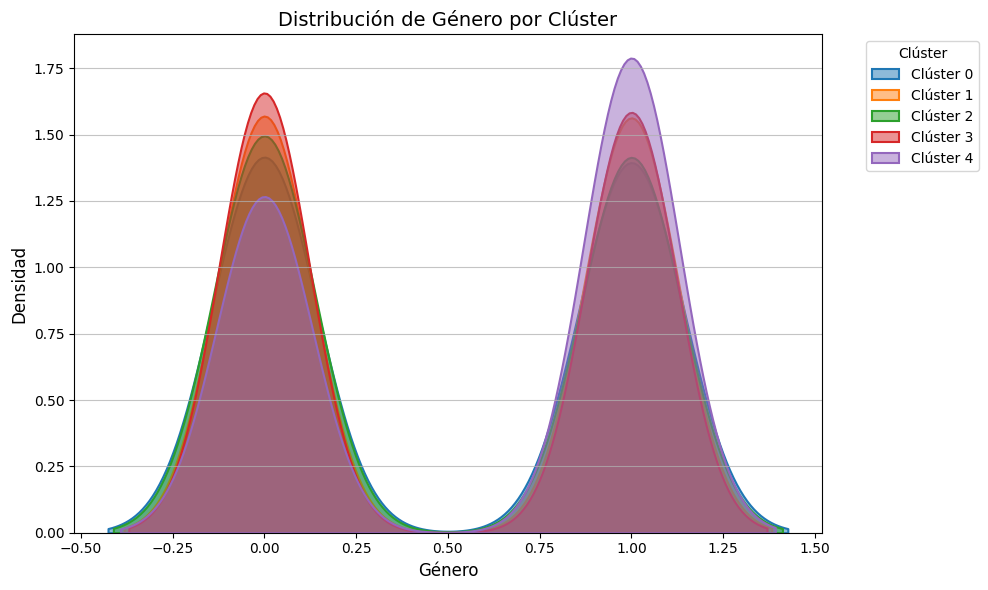

/tmp/ipython-input-4226796764.py:37: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipython-input-4226796764.py:37: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


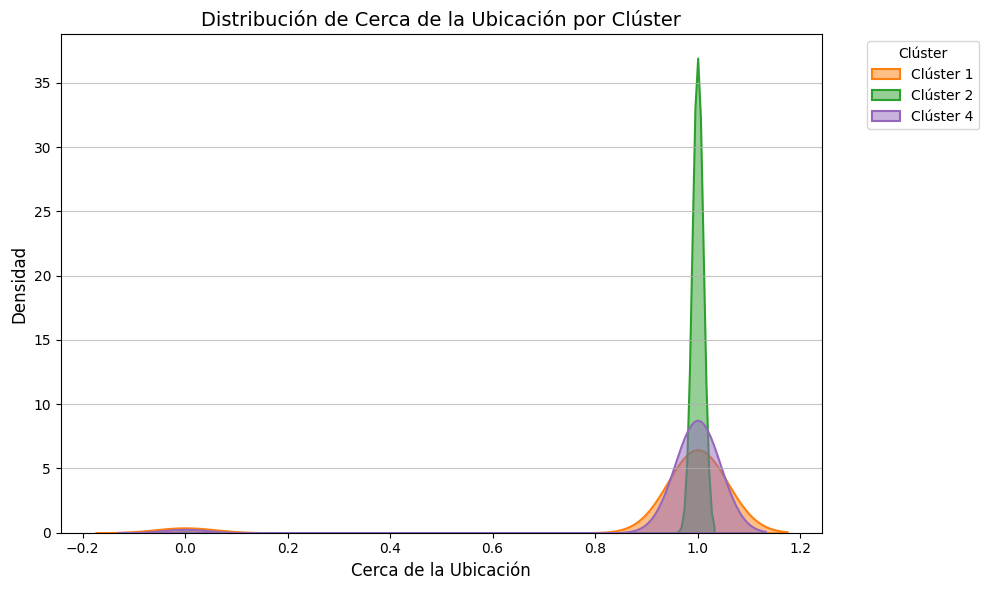

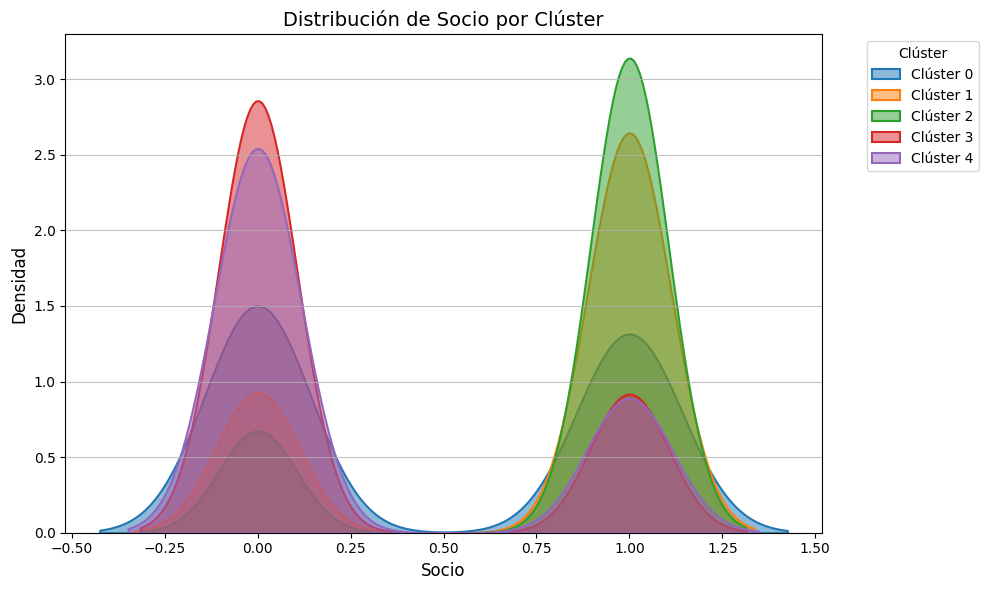

/tmp/ipython-input-4226796764.py:37: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


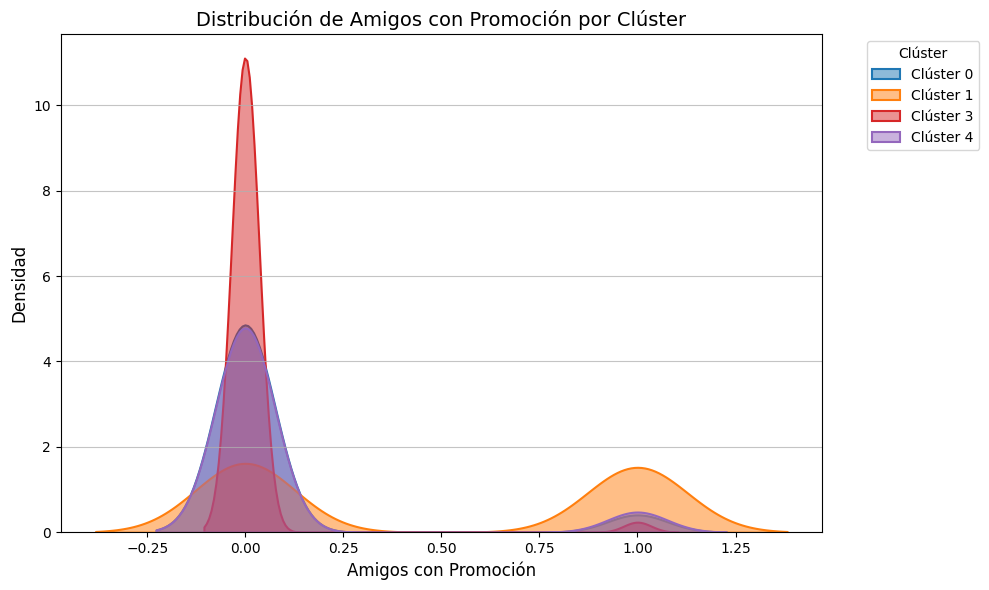

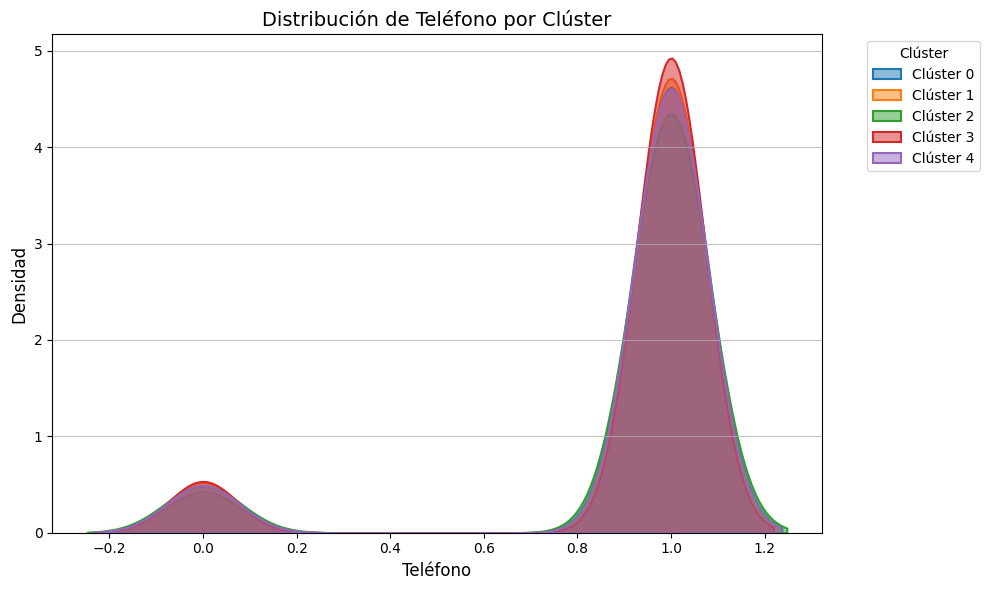

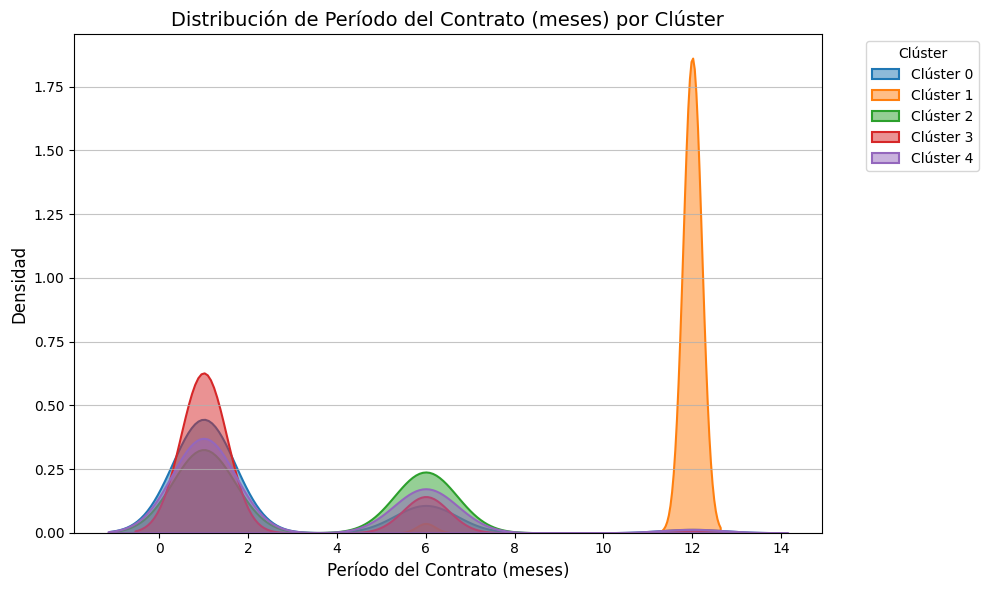

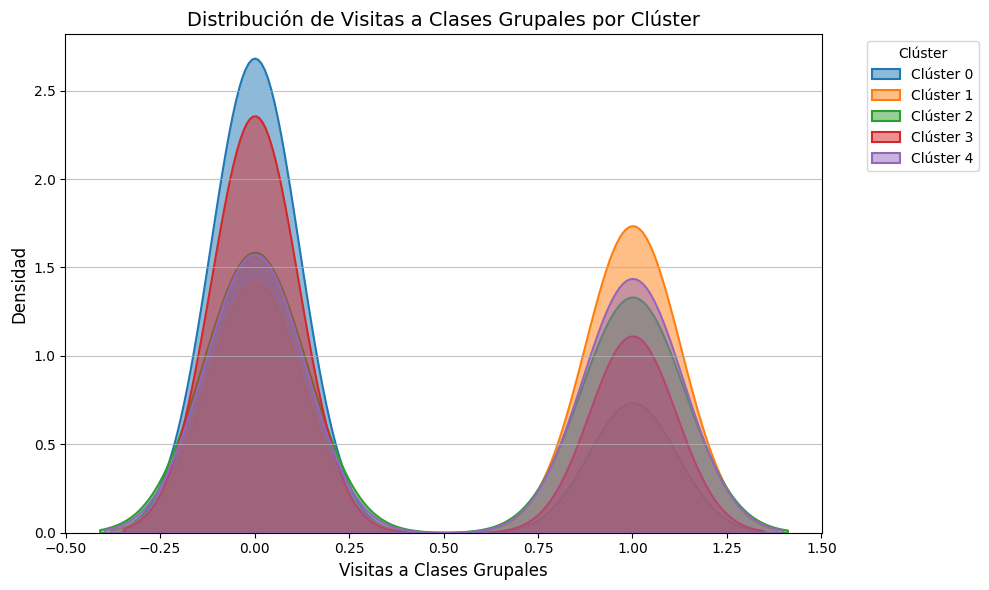

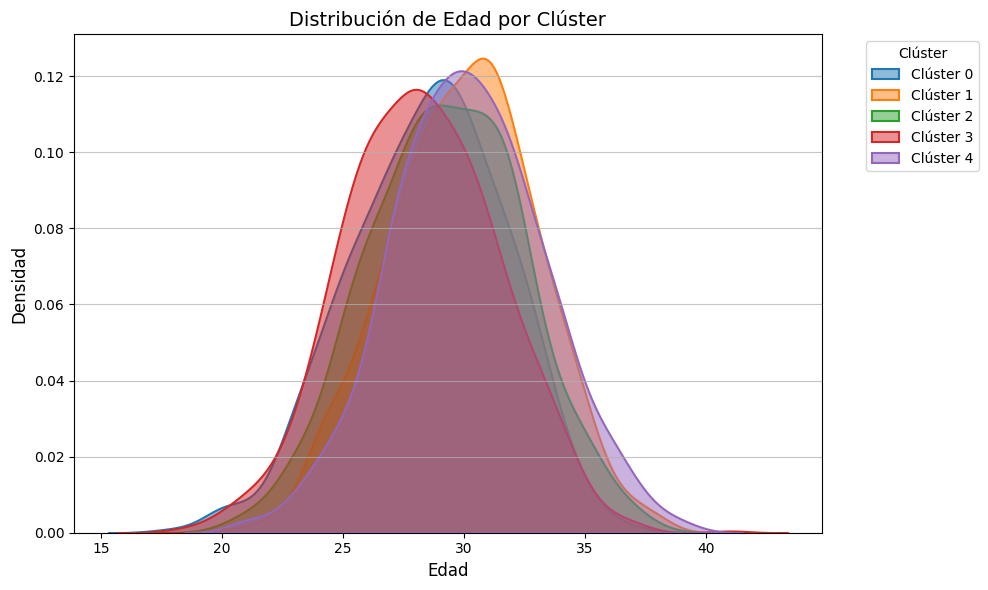

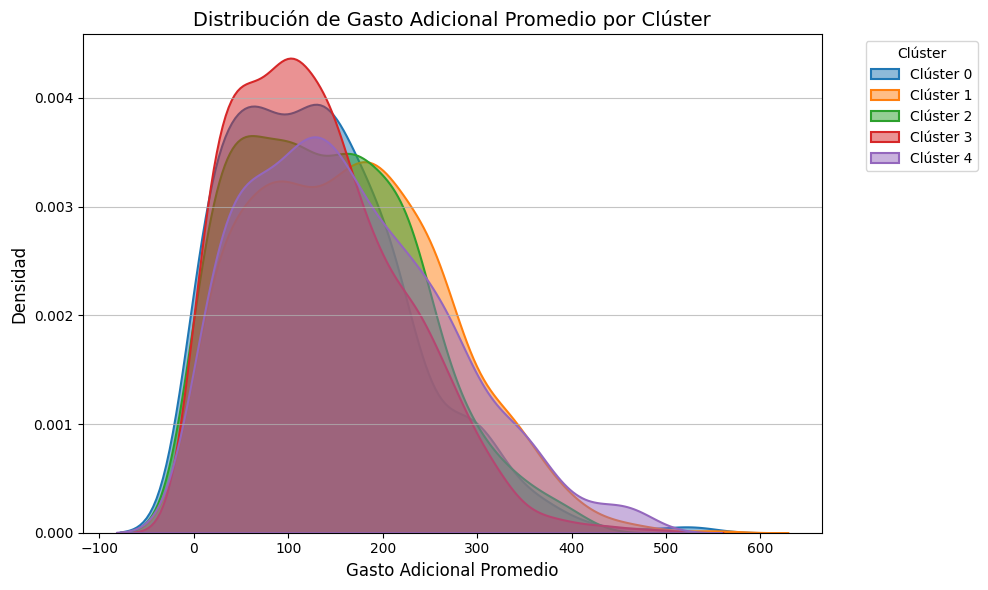

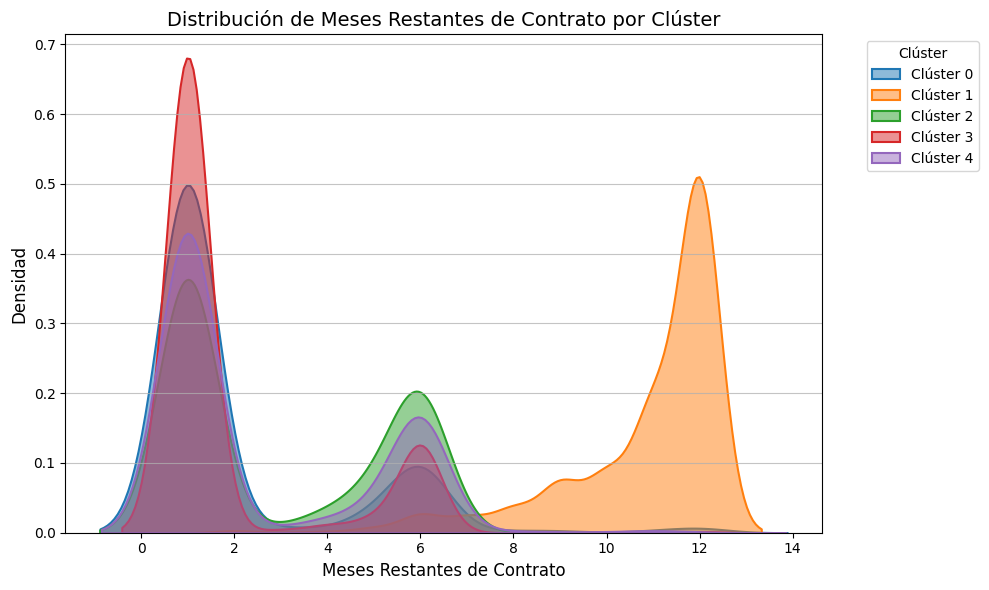

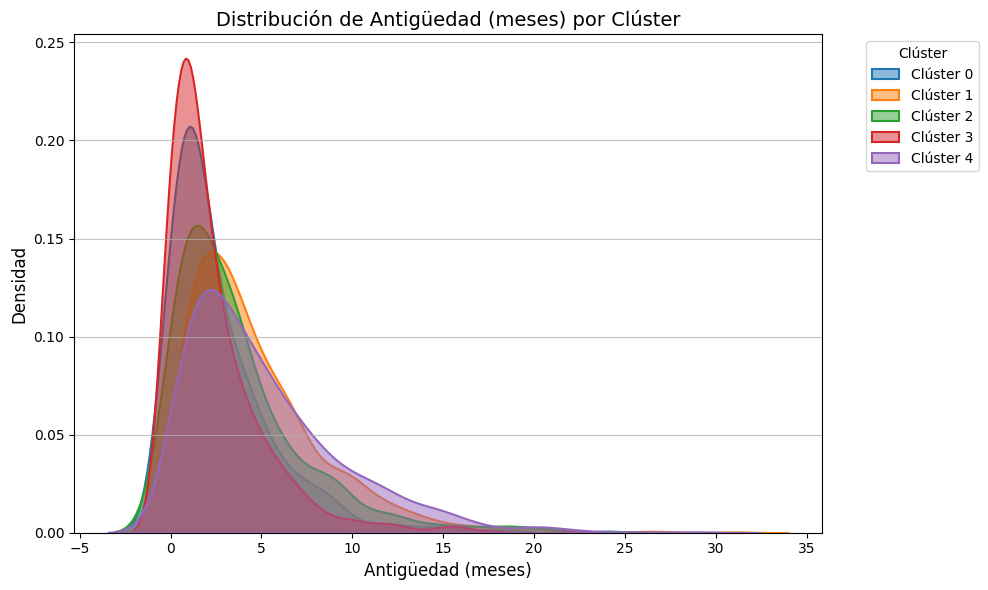

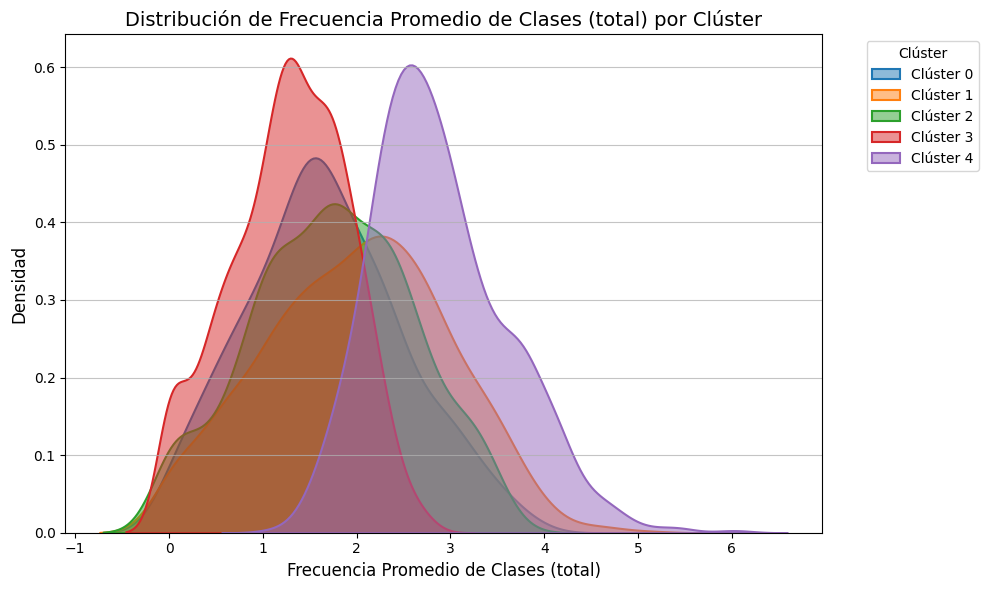

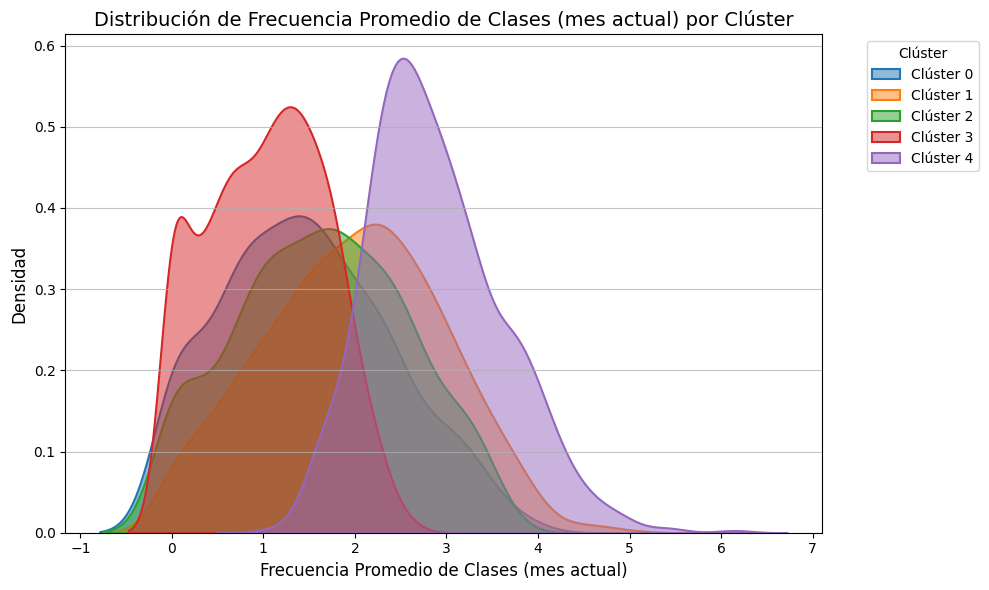

Gráficos de distribución por clúster generados exitosamente.


In [ ]:
import seaborn as sns
import numpy as np

# Diccionario para "mapear" nombres de columnas al español Para mejor interpretacion de los graficos relevantes.
spanish_column_names = {
    'gender': 'Género',
    'Near_Location': 'Cerca de la Ubicación',
    'Partner': 'Socio',
    'Promo_friends': 'Amigos con Promoción',
    'Phone': 'Teléfono',
    'Contract_period': 'Período del Contrato (meses)',
    'Group_visits': 'Visitas a Clases Grupales',
    'Age': 'Edad',
    'Avg_additional_charges_total': 'Gasto Adicional Promedio',
    'Month_to_end_contract': 'Meses Restantes de Contrato',
    'Lifetime': 'Antigüedad (meses)',
    'Avg_class_frequency_total': 'Frecuencia Promedio de Clases (total)',
    'Avg_class_frequency_current_month': 'Frecuencia Promedio de Clases (mes actual)',
    'Churn': 'Churn'
}

# Obtenemos una lista de las columnas numéricas, excluyendo 'Churn' y 'cluster'
# Usamos np.number para incluir todos los tipos numéricos
numerical_columns_for_plot = df.select_dtypes(include=np.number).columns.drop(['Churn', 'cluster'])

# Obtenemos los clústeres únicos
unique_clusters = sorted(df['cluster'].unique())

# Colores para los clústeres (se pueden ajustar si hay más de 5 o se quieren colores específicos)
colors = sns.color_palette('tab10', n_colors=len(unique_clusters))

# Iteramos sobre cada columna numérica y generamos un gráfico de densidad por clúster
for column in numerical_columns_for_plot:
    plt.figure(figsize=(10, 6))
    for i, cluster_id in enumerate(unique_clusters):
        sns.kdeplot(
            df.loc[df['cluster'] == cluster_id, column],
            label=f'Clúster {cluster_id}',
            color=colors[i],
            fill=True,
            alpha=0.5,
            linewidth=1.5
        )

    title_name = spanish_column_names.get(column, column.replace('_', ' ').title())
    plt.title(f'Distribución de {title_name} por Clúster', fontsize=14)
    plt.xlabel(title_name, fontsize=12)
    plt.ylabel('Densidad', fontsize=12)
    plt.legend(title='Clúster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

print("Gráficos de distribución por clúster generados exitosamente.")

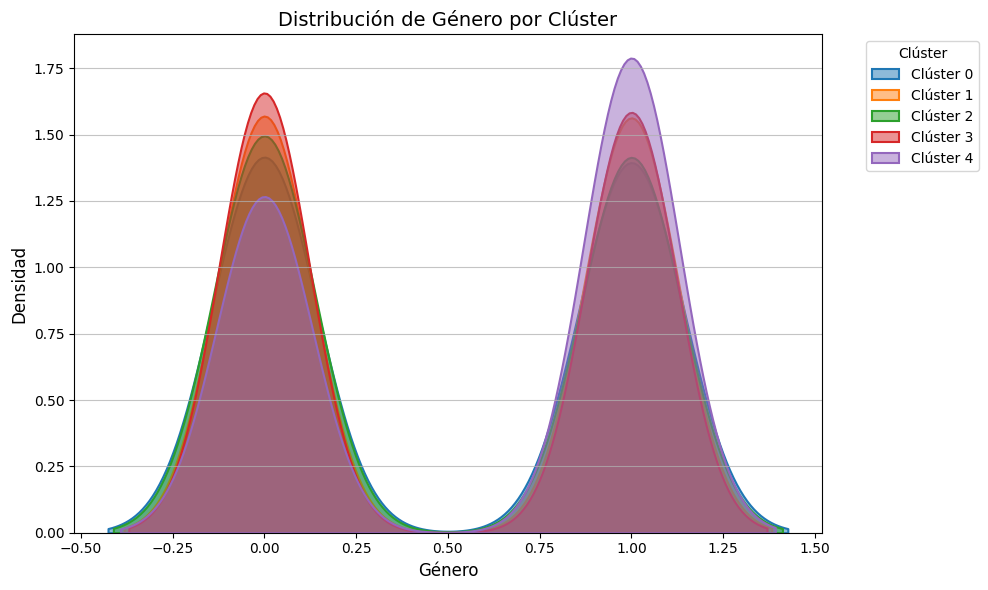

/tmp/ipython-input-4226796764.py:37: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipython-input-4226796764.py:37: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


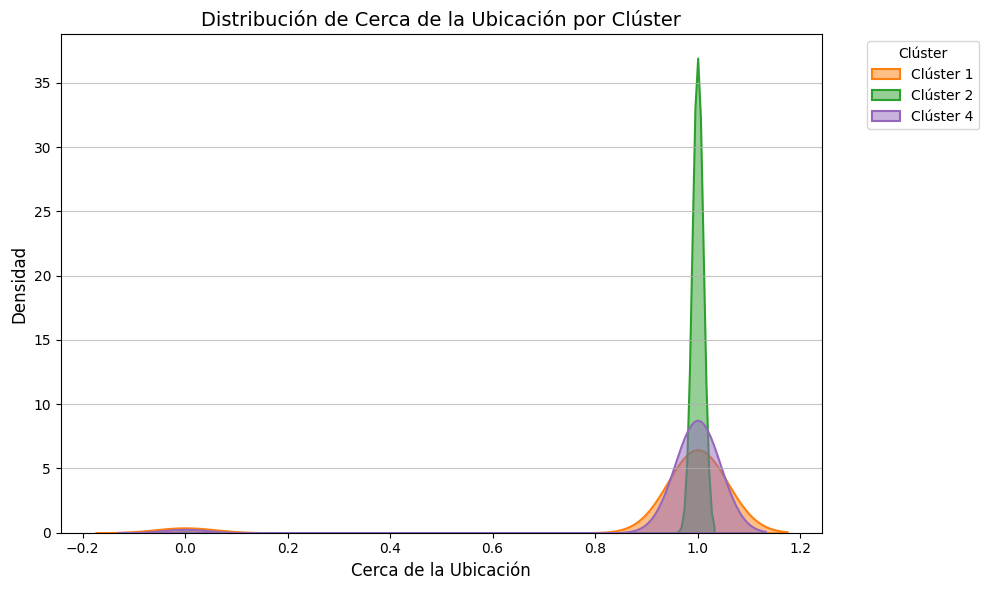

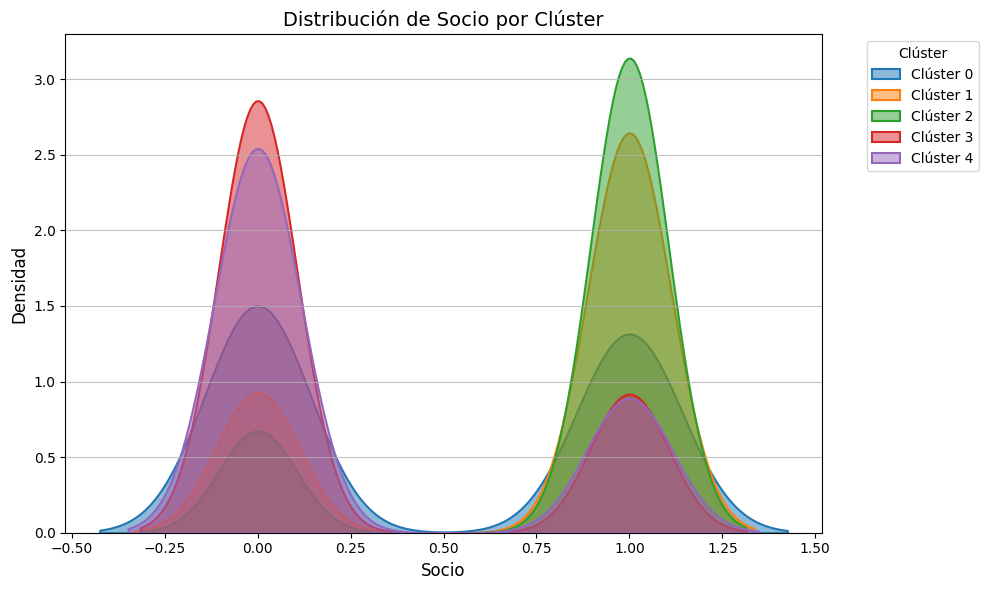

/tmp/ipython-input-4226796764.py:37: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


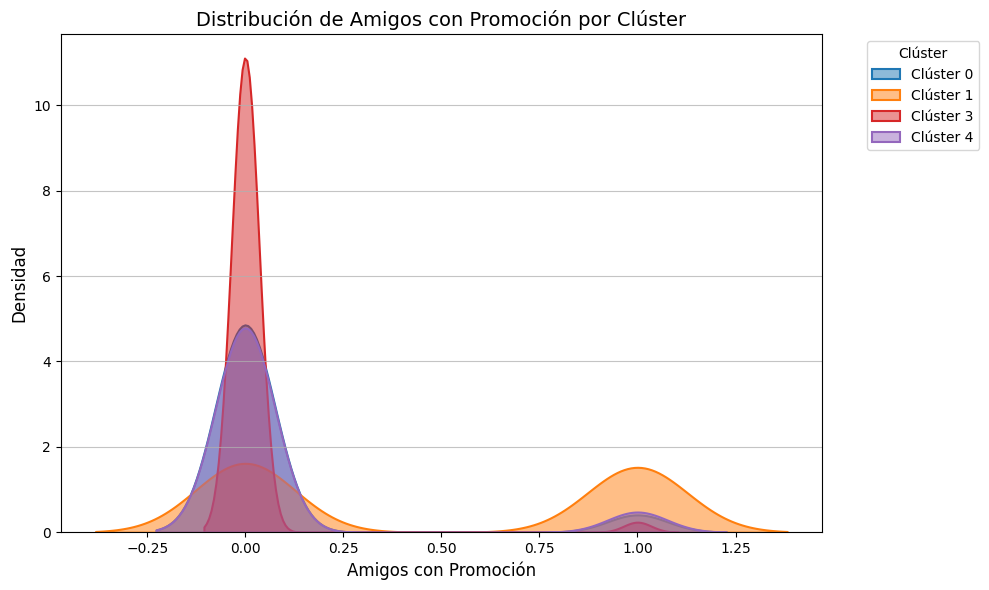

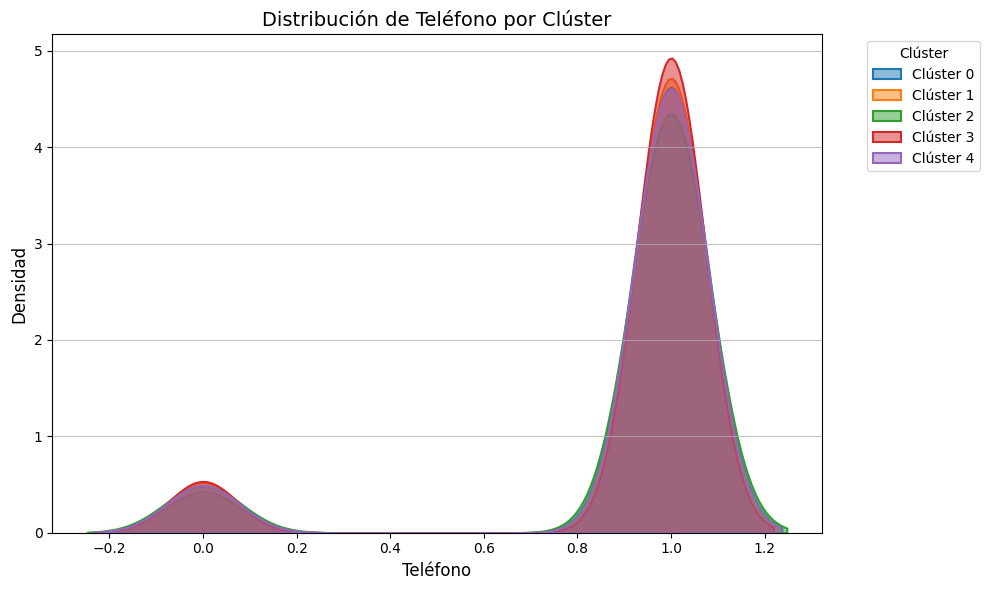

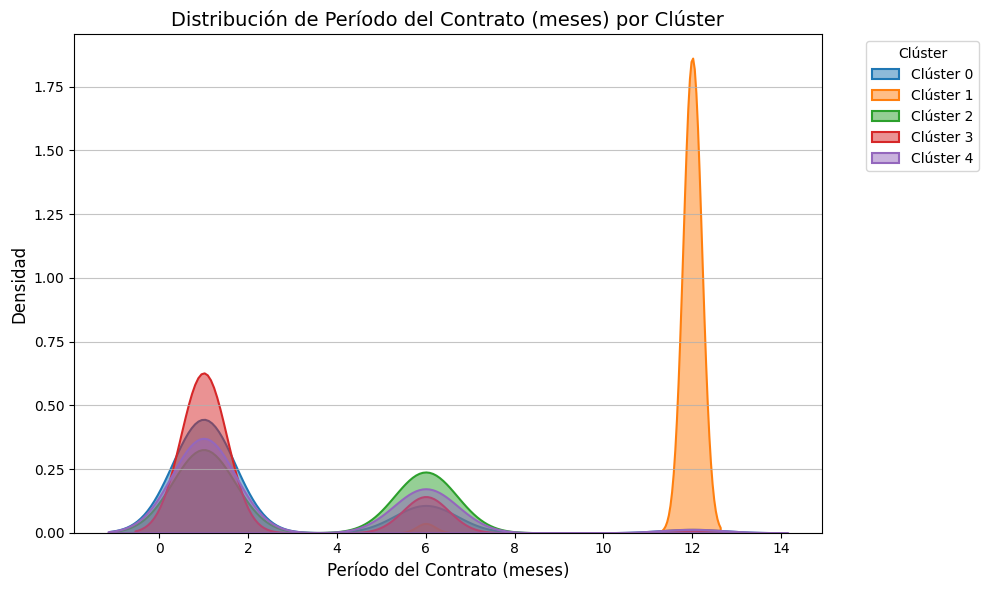

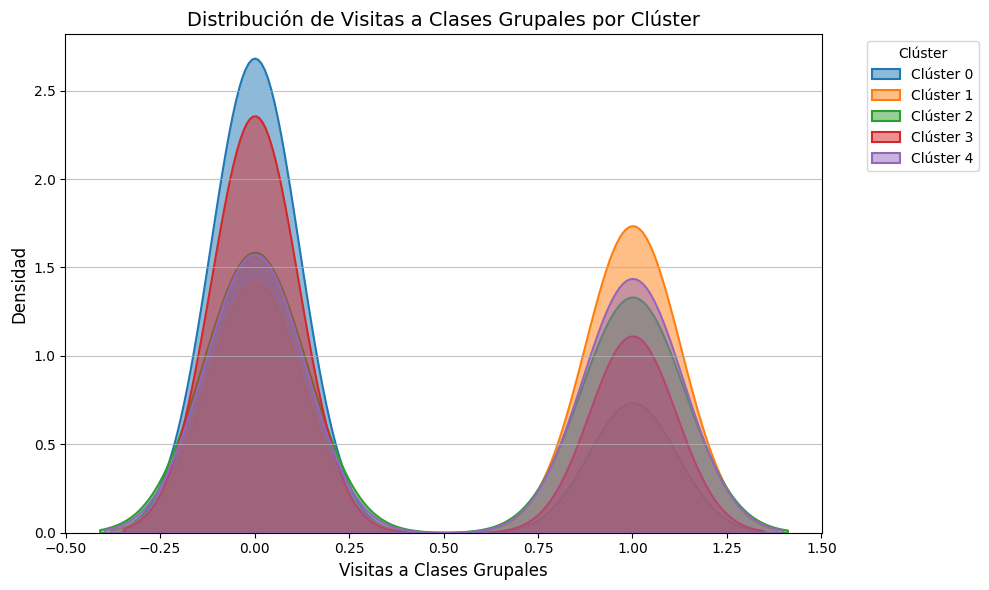

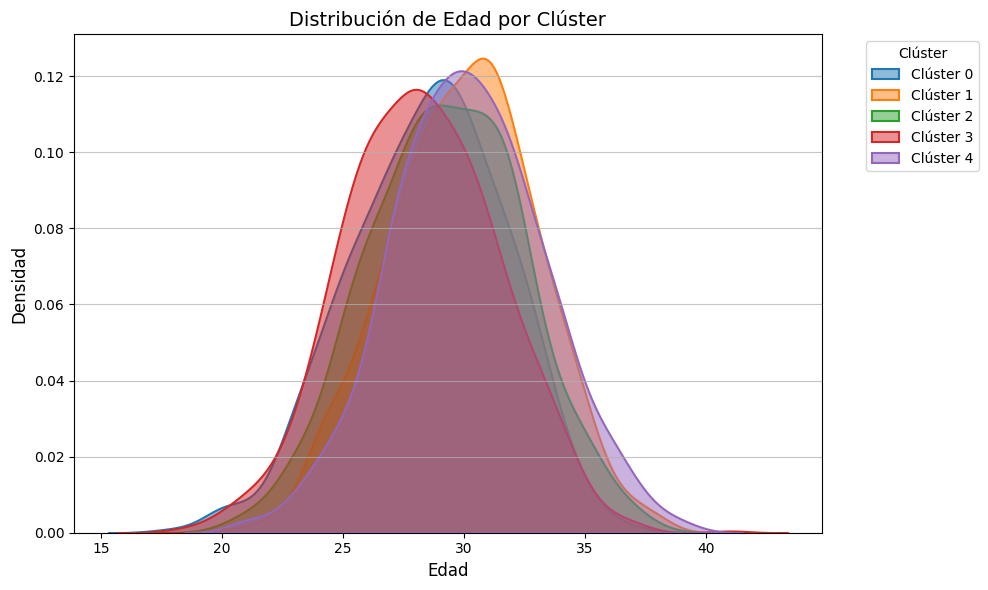

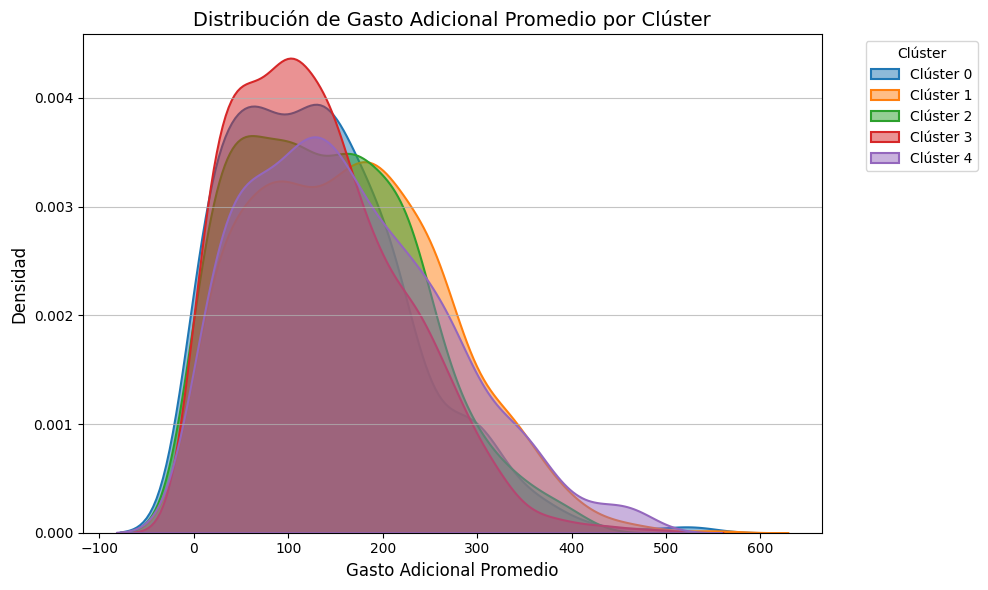

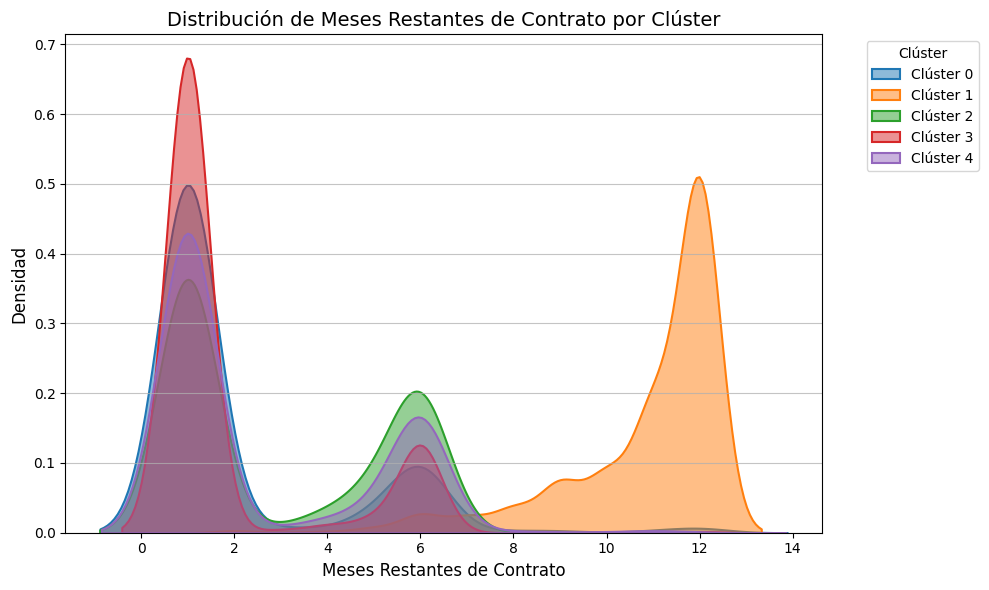

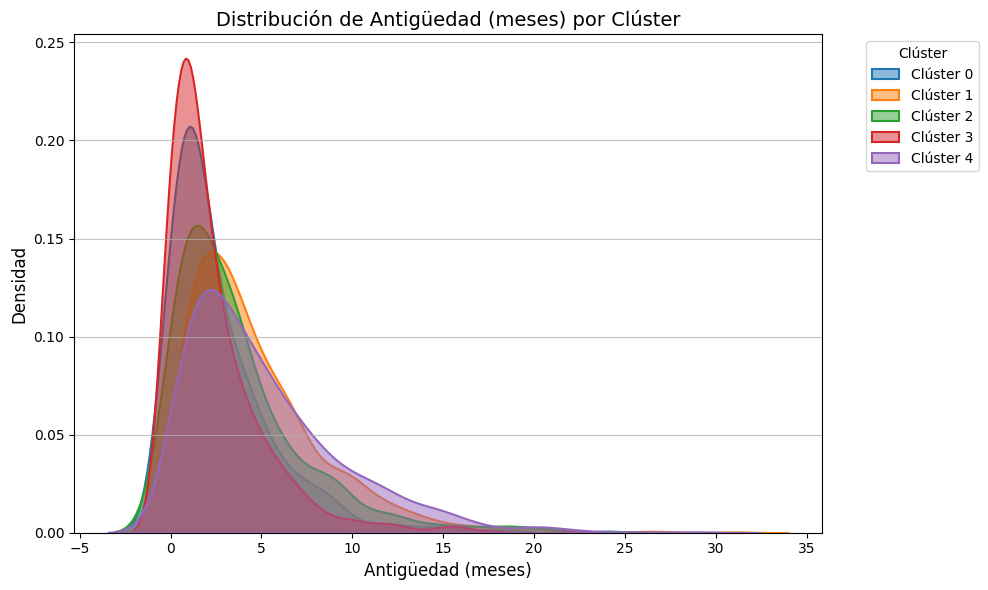

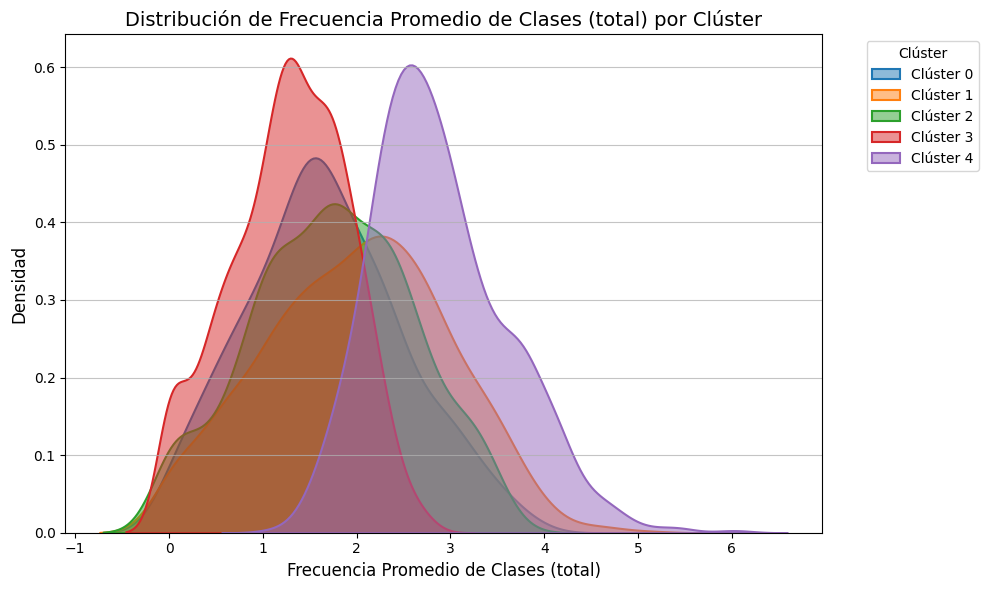

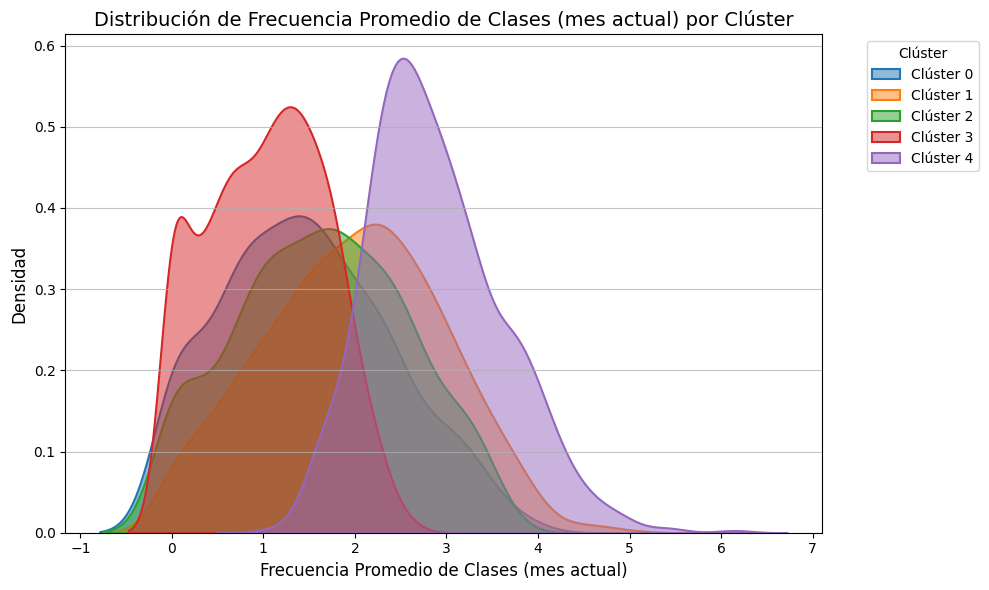

Gráficos de distribución por clúster generados exitosamente.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy to use np.number

# Diccionario para mapear nombres de columnas a español
spanish_column_names = {
    'gender': 'Género',
    'Near_Location': 'Cerca de la Ubicación',
    'Partner': 'Socio',
    'Promo_friends': 'Amigos con Promoción',
    'Phone': 'Teléfono',
    'Contract_period': 'Período del Contrato (meses)',
    'Group_visits': 'Visitas a Clases Grupales',
    'Age': 'Edad',
    'Avg_additional_charges_total': 'Gasto Adicional Promedio',
    'Month_to_end_contract': 'Meses Restantes de Contrato',
    'Lifetime': 'Antigüedad (meses)',
    'Avg_class_frequency_total': 'Frecuencia Promedio de Clases (total)',
    'Avg_class_frequency_current_month': 'Frecuencia Promedio de Clases (mes actual)',
    'Churn': 'Churn'
}

# Obtenemos una lista de las columnas numéricas, excluyendo 'Churn' y 'cluster'
# Usamos np.number para incluir todos los tipos numéricos (como int32, int64, float64)
numerical_columns_for_plot = df.select_dtypes(include=np.number).columns.drop(['Churn', 'cluster'])

# Obtenemos los clústeres únicos
unique_clusters = sorted(df['cluster'].unique())

# Colores para los clústeres (se pueden ajustar si hay más de 5 o se quieren colores específicos)
colors = sns.color_palette('tab10', n_colors=len(unique_clusters))

# Iteramos sobre cada columna numérica y generamos un gráfico de densidad por clúster
for column in numerical_columns_for_plot:
    plt.figure(figsize=(10, 6))
    for i, cluster_id in enumerate(unique_clusters):
        sns.kdeplot(
            df.loc[df['cluster'] == cluster_id, column],
            label=f'Clúster {cluster_id}',
            color=colors[i],
            fill=True,
            alpha=0.5,
            linewidth=1.5
        )

    title_name = spanish_column_names.get(column, column.replace('_', ' ').title())
    plt.title(f'Distribución de {title_name} por Clúster', fontsize=14)
    plt.xlabel(title_name, fontsize=12)
    plt.ylabel('Densidad', fontsize=12)
    plt.legend(title='Clúster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

print("Gráficos de distribución por clúster generados exitosamente.")

## Observaciones:
### Los gráficos de distribución han servido para validar y visualizar de forma efectiva los perfiles de clúster. Nos confirman que las diferencias entre los grupos no son solo en sus promedios, sino en la forma en que se comportan sus datos a lo largo de todo el rango de cada característica. Esto nos da una confianza aún mayor en la distinción y coherencia de nuestros segmentos de clientes.

## Calcular la tasa promedio de Churn por Clúster
### Servirá para identificar los grupos de usuarios con mayor y menor propensión a la fuga de clientes.


In [ ]:
churn_rate_by_cluster = df.groupby('cluster')['Churn'].mean()
print("Tasa de Churn promedio por clúster:")
display(churn_rate_by_cluster)

Tasa de Churn promedio por clúster:


,Churn
cluster,
0,0.450368
1,0.022436
2,0.246130
3,0.526649
4,0.069100


## Observaciones y analisis

Al ver las tasas de Churn promedio para cada clúster, podemos identificar claramente qué grupos de clientes son más propensos a abandonar y cuáles son más leales:

*   **Clúster 3; Clientes nuevos de bajo compromiso :** Con una tasa de Churn de 0.527, este clúster presenta la mayor propensión al abandono. Esto confirma nuestro análisis inicial de que los clientes nuevos con contratos cortos y baja frecuencia de visitas son el grupo de mayor riesgo.

*   **Clúster 0; Clientes de Bajo Compromiso y Cercanía:** Este grupo muestra una tasa de Churn de 0.450. Aunque es alta, es ligeramente inferior al Clúster 3, lo que sugiere que aunque viven lejos y tienen contratos cortos, su riesgo es significativo y necesita atención.

*   **Clúster 2; Clientes activos con amigos:** La tasa de Churn para este grupo es de 0.246, lo que está cerca del promedio general del dataset de 0.265%. Aunque tienen conexiones sociales, su compromiso contractual y la frecuencia de visitas moderada los mantiene en un riesgo considerable, pero manejable.

*   **Clúster 4; Clientes muy activos y antiguos:** Con una tasa de Churn de 0.069, este clúster demuestra una alta lealtad y bajo riesgo de abandono. Su alta frecuencia de clases y antigüedad son factores clave en su retención.

*   **Clúster 1 Clientes leales de largo plazo:** Este es el grupo con la tasa de Churn más baja, 0.022. Estos clientes tienen los contratos más largos, mayor antigüedad y realizan más gastos adicionales, consolidándolos como el segmento más fiel.

##Conclusión general:

### El análisis ha permitido segmentar a los clientes en cinco grupos distintos con perfiles de comportamiento y tasas de Churn muy diferenciados. Esta segmentación es fundamental para que Model Fitness pueda diseñar estrategias de retención personalizadas y más efectivas:

###1.  **Priorización de Intervenciones:** Los **Clústeres 3 y 0** deben ser el foco principal de las estrategias de prevención de Churn, por su alto riesgo. Esto implica un contacto proactivo, ofertas especiales para contratos más largos, programas de 'bienvenida' dinámicos y monitoreo cercano de la asistencia para los clientes del Clúster 3, y tal vez incentivos para compensar la distancia para el Clúster 0.

###2.  **Fomento de la Lealtad:** Para los **Clústeres 1 y 4**, la estrategia debe centrarse en mantener su alta satisfacción y compromiso. Esto puede incluir programas de fidelidad, reconocimiento por su antigüedad y actividad, y quizas algo como acceso anticipado a nuevas clases o servicios.

###3.  **Fortalecimiento de Conexiones Sociales:** Para el **Clúster 2**, se podría trabajar en fortalecer los lazos comunitarios dentro del gimnasio, organizar eventos exclusivos para grupos de amigos o socios corporativos, e incentivar aún más las referencias para aumentar su compromiso y prolongar sus contratos.

###Al entender las características específicas y los riesgos asociados a cada segmento, Model Fitness puede optimizar la asignación de recursos, desarrollando campañas de marketing y programas de servicio al cliente que resuenen con las necesidades y comportamientos de cada grupo. Esto no solo mejorará la retención, sino que también puede aumentar la rentabilidad a largo plazo al convertir clientes de alto riesgo en miembros leales y comprometidos.

# Customer Retention Strategy for Model Fitness: Predictive Churn Analysis

## 1. Problem

Model Fitness, a gym chain, faces the challenge of customer churn, where clients decide to terminate their memberships. This churn directly impacts the economic health and growth of the business. This project aims to develop a data-driven customer retention strategy by identifying at-risk clients and the key factors driving their decisions, allowing for the implementation of proactive and personalized actions.

## 2. Data

The `gym_churn_us.csv` dataset provides detailed information about Model Fitness clients. It consists of 4000 rows and 14 columns, with no missing values, indicating high data quality.

**Key Data Characteristics:**
*   **Gender, Near_Location, Partner, Promo_friends, Phone, Group_visits, Churn:** Binary (0/1) indicators.
*   **Contract_period, Month_to_end_contract, Lifetime, Age:** Integer values related to membership duration and demographics.
*   **Avg_additional_charges_total, Avg_class_frequency_total, Avg_class_frequency_current_month:** Float values representing spending and attendance frequency.

**Initial Observations:**
*   An overall churn rate of **26.5%** was observed.
*   The average age of clients is around 29, indicating a young-to-middle-aged client base.
*   84.5% of clients live near the gym.

## 3. Method

### 3.1. Exploratory Data Analysis (EDA)

*   **Data Loading & Initial Inspection:** Loaded `gym_churn_us.csv` and performed initial checks for size, types, and null values.
*   **Descriptive Statistics:** Summarized numerical features.
*   **Churn-based Analysis:** Calculated mean feature values for churned (Churn=1) and retained (Churn=0) customers.
*   **Distribution Visualization:** Used histograms to compare feature distributions across churn groups.
*   **Correlation Matrix:** Generated a heatmap to visualize correlations between all variables, particularly with `Churn`.

**Key EDA Findings:**
*   **Commitment Factors:** Contract duration (1-month contracts, nearing end of contract), customer `Lifetime`, and `Avg_class_frequency_current_month` are strong churn predictors.
*   **Financial Engagement:** Higher `Avg_additional_charges_total` correlates with lower churn.
*   **Social Connection:** `Promo_friends` and `Group_visits` positively influence retention.
*   **Onboarding Vulnerability:** Most churn occurs in the early stages of membership.

### 3.2. Predictive Modeling for Churn

*   **Objective:** To predict future churn to proactively identify at-risk clients.
*   **Data Preprocessing:**
    *   Split data into features (X) and target (y = `Churn`).
    *   Divided into training (75%) and testing (25%) sets (`random_state=42`).
    *   Scaled features using `StandardScaler`.
*   **Models Trained:**
    *   **Logistic Regression:** Chosen for binary classification and interpretability.
    *   **Random Forest Classifier:** Selected for robustness and ability to handle non-linear relationships.
*   **Evaluation Metrics:** Accuracy, Precision, and Recall were used to assess model performance.

### 3.3. Customer Segmentation (Clustering)

*   **Objective:** Group customers with similar characteristics for personalized retention strategies.
*   **Data Preparation:** Removed `Churn` column and standardized remaining features.
*   **Optimal Cluster Estimation:** A dendrogram was used to visually determine an optimal number of 5 clusters for K-Means.
*   **K-Means Clustering:** Applied K-Means with 5 clusters to segment the customers.
*   **Profile Analysis:** Calculated mean characteristics for each cluster and analyzed their specific churn rates to create detailed user profiles.
*   **Visualization:** Generated density plots to visualize feature distributions per cluster.

## 4. Results/KPIs

### 4.1. Predictive Model Performance

| Metric    | Logistic Regression | Random Forest |
|-----------|---------------------|---------------|
| **Accuracy**| 0.9260              | 0.9150        |
| **Precision**| 0.8841              | 0.8621        |
| **Recall**  | 0.8142              | 0.7905        |

**Conclusion:** The **Logistic Regression** model outperformed Random Forest across all metrics, particularly in **Recall (0.8142)**. This makes it the preferred model for churn prediction, as it is better at identifying a larger proportion of actual churning customers (minimizing false negatives), which is critical for effective retention efforts.

### 4.2. Customer Cluster Profiles and Churn Rates

Five distinct customer clusters were identified:

*   **Cluster 0: Low Commitment & Distant Customers**
    *   **Churn:** 0.450 (high)
    *   **Profile:** Live far from the gym, short contracts, low lifetime, moderate-low visit frequency. High churn risk.
*   **Cluster 1: Loyal, Long-Term Customers**
    *   **Churn:** 0.022 (very low)
    *   **Profile:** Very long contracts, high remaining contract time, good lifetime, high additional spending. Most valuable and loyal.
*   **Cluster 2: Active Customers with Social Connections**
    *   **Churn:** 0.246 (moderate)
    *   **Profile:** Referred by friends or corporate partners, medium contract duration, moderate visit frequency. Churn risk near average.
*   **Cluster 3: New, Low Commitment Customers**
    *   **Churn:** 0.527 (highest)
    *   **Profile:** Very low lifetime, very short contracts, few months left on contract, very low visit frequency. Highest churn risk.
*   **Cluster 4: Highly Active & Senior Customers**
    *   **Churn:** 0.069 (low)
    *   **Profile:** Very high class frequency, highest lifetime, slightly older age. Highly active and committed.

**Impact on Retention Strategy:** This segmentation allows for tailored interventions:
*   **Prioritize Clusters 0 & 3:** Focus intensive efforts on these high-risk groups (proactive contact, longer contract offers, improved onboarding, attendance monitoring).
*   **Foster Loyalty in Clusters 1 & 4:** Maintain satisfaction for loyal customers (loyalty programs, recognition, exclusive services).
*   **Strengthen Social Ties in Cluster 2:** Enhance community events and incentivize referrals to boost engagement and extend contracts.

## 5. How to Run

1.  **Environment:** Ensure you have a Python environment with `pandas`, `scikit-learn`, `matplotlib`, `seaborn`, and `scipy` installed.
2.  **Data:** Download `gym_churn_us.csv` and place it in `/content/drive/MyDrive/Colab Notebooks/proyecto_sprint14/` or update the `pd.read_csv()` path in the notebook.
3.  **Execution:** Run the Jupyter Notebook (`.ipynb`) cells sequentially from top to bottom.

## 6. Demo

The notebook provides a comprehensive demonstration of the analysis. Upon execution, users will see:

*   **Data Overview:** Initial DataFrame head, info, and descriptive statistics.
*   **EDA Visualizations:** Histograms showing feature distributions by churn status, and a correlation heatmap.
*   **Model Evaluation:** Printed metrics (Accuracy, Precision, Recall) for both Logistic Regression and Random Forest models.
*   **Clustering Analysis:** A dendrogram for cluster estimation, a table of mean characteristics for each of the 5 K-Means clusters, and density plots visualizing feature distributions across these clusters.
*   **Churn Rate by Cluster:** A clear display of churn rates for each identified customer segment.

Throughout the notebook, markdown cells provide detailed observations, analyses, conclusions, and strategic recommendations, guiding you through the entire process from raw data to actionable business insights for Model Fitness.